In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'/Users/weilu/Research/opt_server/')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from Bio.PDB.Polypeptide import d1_to_index
from Bio.PDB.Polypeptide import dindex_to_1
from Bio.PDB.Polypeptide import aa3

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [20]:
def get_cb_atom(res, resType):
    if resType == "G":
        atom = res["CA"]
    else:
        atom = res["CB"]
    return atom

In [40]:
from Bio.PDB.Polypeptide import d1_to_index
from Bio.PDB.Polypeptide import dindex_to_1

pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
movieFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/{pdb}/0/movie.pdb"
def get_native_and_decoy_contact_info(pdbFile, movieFile, seq, frame_index=0):
    # frame_index = 0
    cutoff = 9.5
    MAX_OFFSET = 9
    parser = PDBParser()
    structure = parser.get_structure("x", pdbFile)
    models = list(structure.get_models())
    model = models[frame_index]
    all_residues = list(model.get_residues())
    
    decoy_structure = parser.get_structure("x", movieFile)
    decoy_models = list(decoy_structure.get_models())

    info_ = []
    for i, res1 in enumerate(all_residues):
        a1 = get_cb_atom(res1, seq[i])
        for j, res2 in enumerate(all_residues):
            a2 = get_cb_atom(res2, seq[j])
            dis = a1 - a2
            dis_list = [dis]
            for decoy_frame_index in range(-50, 0): 
                decoy_model = decoy_models[decoy_frame_index]
                decoy_all_residues = list(decoy_model.get_residues())
                assert len(all_residues) == len(decoy_all_residues)
                decoy_a1 = get_cb_atom(decoy_all_residues[i], seq[i])
                decoy_a2 = get_cb_atom(decoy_all_residues[j], seq[j])
                decoy_dis = decoy_a1 - decoy_a2
                dis_list.append(decoy_dis)
            with_in_cutoff = any(dis<cutoff for dis in dis_list)
            if j - i > MAX_OFFSET and with_in_cutoff:
                info_.append([pdb, i, j, seq[i], seq[j]] + dis_list)
    
    info = pd.DataFrame(info_, columns=["Protein", "i", "j", "Resi", "Resj"] + ["dis_native"] + [f"dis{i}" for i in range(0,50)])
    return info

In [41]:
pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
movieFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/{pdb}/0/movie.pdb"
info = get_native_and_decoy_contact_info(pdbFile, movieFile, seq, frame_index=0)

In [83]:
info_ = []
for i, pdb in enumerate(pdb_list):
    print(i)
    pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
    seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
    movieFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_new_2/{pdb}/0/movie.pdb"
    info = get_native_and_decoy_contact_info(pdbFile, movieFile, seq, frame_index=0)
    info_.append(info)
    
    
    
    
info = pd.concat(info_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [85]:
info.to_csv("/Users/weilu/Research/server/mar_2020/mass_iterative_run/dis_info.csv")

In [87]:
info = pd.read_csv("/Users/weilu/Research/server/mar_2020/mass_iterative_run/dis_info.csv", index_col=0)

In [180]:
a = pd.read_csv("/Users/weilu/opt/parameters/side_chain/cbd_cbd_real_contact_symmetric.csv")

In [38]:
a

,Res1,Res2,Type,Theta,Index1,Index2,r,Interaction,Index,Gamma,theta_gamma
0,ILE,ASN,Protein,0.509,0,101,9.496481,Protein,256,-0.463,-0.235667
1,ILE,ASN,Protein,0.981,32,101,9.105055,Protein,256,-0.463,-0.454203
2,ILE,ASN,Protein,0.000,47,86,11.481540,Protein,256,-0.463,-0.000000
3,ILE,ASN,Protein,0.548,47,92,9.480688,Protein,256,-0.463,-0.253724
4,ILE,ASN,Protein,0.000,49,86,14.068905,Protein,256,-0.463,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4129,ASN,PHE,Water,0.000,92,117,8.285746,Water,470,0.174,0.000000
4130,ASN,PHE,Direct,0.000,92,117,8.285746,Direct,50,0.113,0.000000
4131,ASN,GLU,Protein,0.000,92,118,10.309171,Protein,253,-0.033,-0.000000
4132,ASN,GLU,Water,0.000,92,118,10.309171,Water,463,-0.182,-0.000000


In [187]:
res1_name = "ARG"
res2_name = "VAL"
a.query(f"ResName1=='{res1_name}' and ResName2=='{res2_name}'")

,ResName1,ResName2,r_max,r_min,r_diff


In [188]:
a.query(f"ResName1=='{res2_name}' and ResName2=='{res1_name}'")

,ResName1,ResName2,r_max,r_min,r_diff
67,VAL,ARG,5.138564,3.673704,1.46486


In [189]:
b = a.query(f"ResName1=='{res1_name}' and ResName2=='{res2_name}'")
if len(b) == 0:
    b = a.query(f"ResName1=='{res2_name}' and ResName2=='{res1_name}'")
r_min = float(b["r_min"])
r_max = float(b["r_max"])

In [202]:
from Bio.PDB.Polypeptide import three_to_one

In [204]:
three_to_one("SER")

'S'

In [205]:
gamma_se_map_1_letter = {   'A': 0,  'R': 1,  'N': 2,  'D': 3,  'C': 4,
                            'Q': 5,  'E': 6,  'G': 7,  'H': 8,  'I': 9,
                            'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14,
                            'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
def three_to_index(resName):
    return gamma_se_map_1_letter[three_to_one(resName)]

In [207]:
three_to_index("GLY")

7

In [208]:
r_min_direct_table = np.zeros((20, 20))
r_min_direct_table[three_to_index("GLY"),:] = 2.5
r_min_direct_table[:,three_to_index("GLY")] = 2.5
r_max_direct_table = np.zeros((20, 20))
r_max_direct_table[three_to_index("GLY"),:] = 6.5
r_max_direct_table[:,three_to_index("GLY")] = 6.5

r_min_mediated_table = np.zeros((20, 20))
r_min_mediated_table[three_to_index("GLY"),:] = 6.5
r_min_mediated_table[:,three_to_index("GLY")] = 6.5
r_max_mediated_table = np.zeros((20, 20))
r_max_mediated_table[three_to_index("GLY"),:] = 9.5
r_max_mediated_table[:,three_to_index("GLY")] = 9.5



for i, line in a.iterrows():
    res1 = line["ResName1"]
    res2 = line["ResName2"]
    r_min = line["r_min"]
    r_max = line["r_max"]
    r_min_direct_table[three_to_index(res1)][three_to_index(res2)] = r_min - 0.5
    r_min_direct_table[three_to_index(res2)][three_to_index(res1)] = r_min - 0.5
    
    r_max_direct_table[three_to_index(res1)][three_to_index(res2)] = r_max + 1.5
    r_max_direct_table[three_to_index(res2)][three_to_index(res1)] = r_max + 1.5
    
    r_min_mediated_table[three_to_index(res1)][three_to_index(res2)] = r_max + 1.5
    r_min_mediated_table[three_to_index(res2)][three_to_index(res1)] = r_max + 1.5
    
    r_max_mediated_table[three_to_index(res1)][three_to_index(res2)] = r_max + 4.5
    r_max_mediated_table[three_to_index(res2)][three_to_index(res1)] = r_max + 4.5

In [194]:
a.query(f"ResName1=='GLY'")

,ResName1,ResName2,r_max,r_min,r_diff


In [182]:
a["r_diff"] = a["r_max"] - a["r_min"]

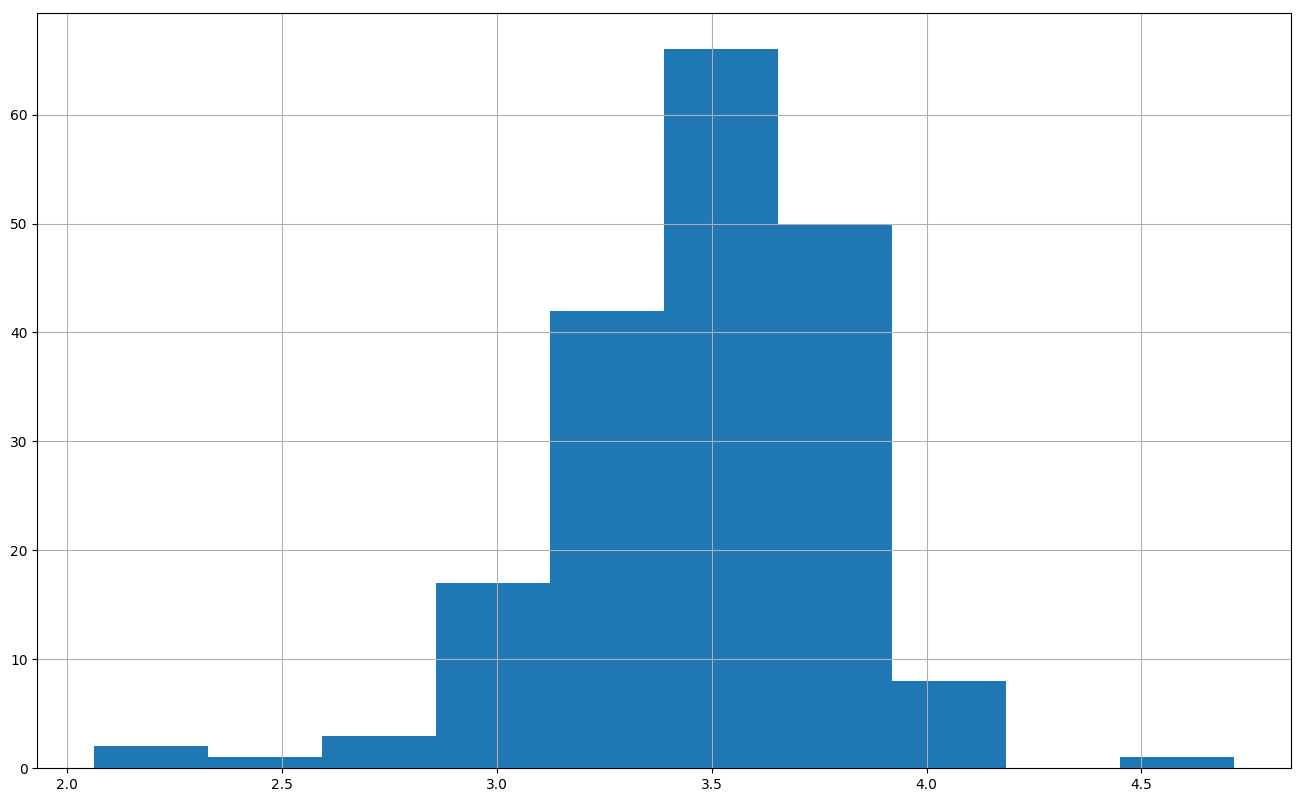

In [184]:
a["r_min"].hist()

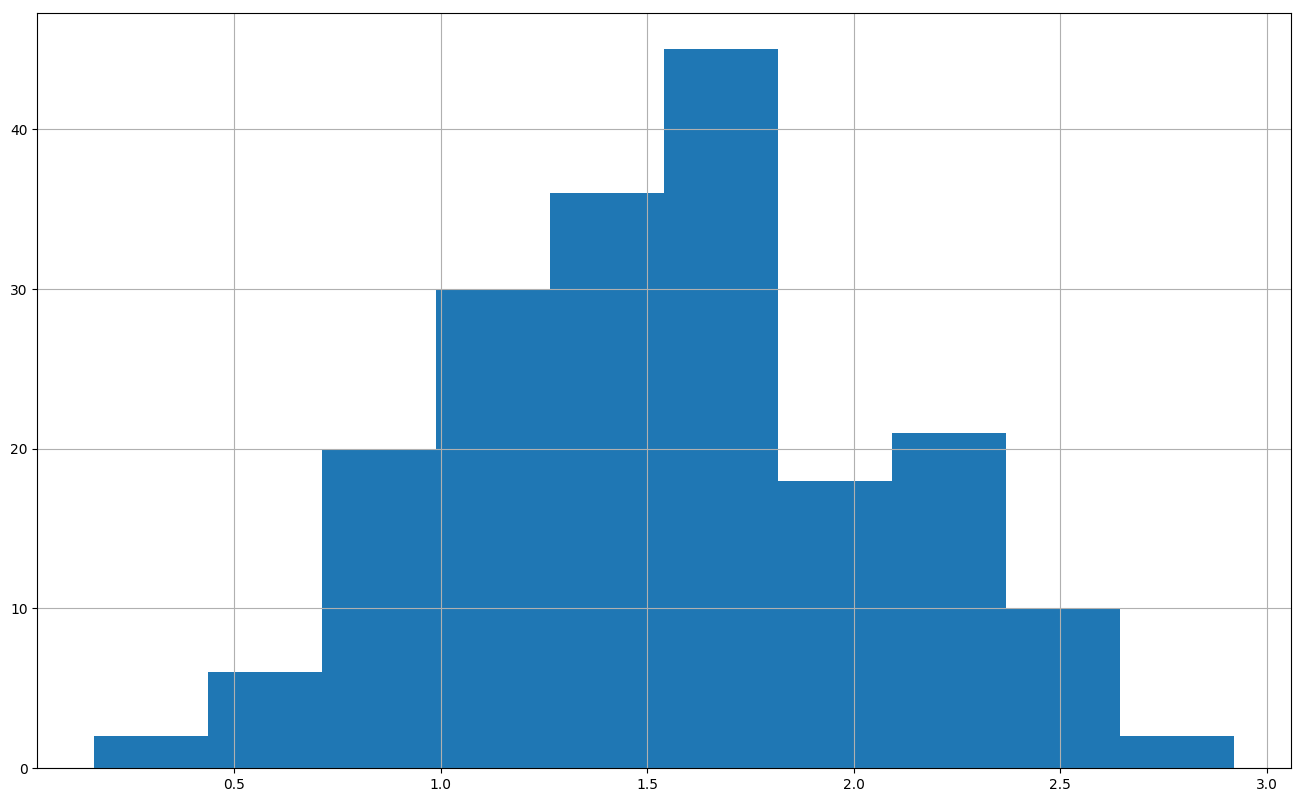

In [183]:
a["r_diff"].hist()

In [88]:
info["with_in_cutoff"] = info.apply(lambda x: sum(x[5:]<6.5), axis=1)

In [89]:
cutoff = 6.5
info["correct"] = info.apply(lambda x: sum((x[5]<cutoff) & (x[6:]<cutoff)), axis=1)

In [90]:
info["n_decoy"] = 50

In [91]:
result = info.query("with_in_cutoff > 0").groupby(["Resi", "Resj"])[["with_in_cutoff", "correct", "n_decoy"]].sum().reset_index()

In [92]:
result["correct_ratio"] = result["correct"] / result["n_decoy"]

In [134]:
a = -1000.123
b = -10.1234
c = -1000.12
print(f"www{a:>8.2f}ww{b:>8.3f}ww{c:>8.3f}ww")
print('{:.8s}'.format('{:0.4f}'.format(a)))

www-1000.12ww -10.123ww-1000.120ww
-1000.12


In [ ]:

def prepare_virtual_sites(pdb_file, use_cis_proline=False):
    parser = PDBParser(QUIET=True)
    structure=parser.get_structure('X',pdb_file,)
    for model in structure:
        for chain in model:
            r_im={}
            r_i={}
            for residue in chain:
                r_im=r_i
                r_i={}
                for atom in residue:
                    r_i[atom.get_name()]=atom
                if use_cis_proline and residue.get_resname() == "IPR":
                    if 'N' in r_i:
                        r_i['N'].set_coord(-0.2094*r_im['CA'].get_coord()+ 0.6908*r_i['CA'].get_coord() + 0.5190*r_im['O'].get_coord())
                    if 'C' in r_im:
                        r_im['C'].set_coord(0.2196*r_im['CA'].get_coord()+ 0.2300*r_i['CA'].get_coord() + 0.5507*r_im['O'].get_coord())
                    if 'H' in r_i:
                        r_i['H'].set_coord(-0.9871*r_im['CA'].get_coord()+ 0.9326*r_i['CA'].get_coord() + 1.0604*r_im['O'].get_coord())
                else:
                    if 'N' in r_i:
                        r_i['N'].set_coord(0.48318*r_im['CA'].get_coord()+ 0.70328*r_i['CA'].get_coord()- 0.18643 *r_im['O'].get_coord())
                    if 'C' in r_im:
                        r_im['C'].set_coord(0.44365*r_im['CA'].get_coord()+ 0.23520*r_i['CA'].get_coord()+ 0.32115 *r_im['O'].get_coord())
                    if 'H' in r_i:
                        r_i['H'].set_coord(0.84100*r_im['CA'].get_coord()+ 0.89296*r_i['CA'].get_coord()- 0.73389 *r_im['O'].get_coord())
    io = PDBIO()
    io.set_structure(structure)
    io.save(pdb_file)

In [171]:
pdb_file = "/Users/weilu/Research/server/mar_2020/C1903/test2/C1903-openmmawsem.pdb"
parser = PDBParser(QUIET=True)
structure=parser.get_structure('X',pdb_file,)
res = list(structure.get_residues())

In [ ]:
def prepare_virtual_sites(pdb_file, use_cis_proline=False):
    output_file = "/Users/weilu/Research/server/mar_2020/C1903/test2/new.pdb"
    output = open(output_file, "w")
    with open(pdb_file) as f:
        index = 0
        for line in f:
            # print(line)
            splitline = line.split()
            if len(line)>4 and line[0:4] == "ATOM":
                try:
                    atom_index=line[6:11].strip()
                    atom_type=line[12:16].strip()
                    res_type=line[17:20].strip()
                    chain=line[21].strip()
                    res_index=line[22:26].strip()
                    x=line[30:38].strip()
                    y=line[38:46].strip()
                    z=line[46:54].strip()
                    element = line[76:78].strip()
                except ValueError:
                    print(line)
                    raise
            else:
                continue
            res_index_zero_base = int(res_index) - 1

            r_im = res[res_index_zero_base-1]
            r_i = res[res_index_zero_base]
            try:
                r_ip = res[res_index_zero_base+1]
            except:
                r_ip = res[res_index_zero_base]  # won't be used
            if use_cis_proline and res_type == "IPR":
                n_coord = -0.2094*r_im['CA'].get_coord()+ 0.6908*r_i['CA'].get_coord() + 0.5190*r_im['O'].get_coord()
                c_coord = 0.2196*r_i['CA'].get_coord()+ 0.2300*r_ip['CA'].get_coord() + 0.5507*r_i['O'].get_coord()
                h_coord = -0.9871*r_im['CA'].get_coord()+ 0.9326*r_i['CA'].get_coord() + 1.0604*r_im['O'].get_coord()
            else:
                n_coord = 0.48318*r_im['CA'].get_coord()+ 0.70328*r_i['CA'].get_coord()- 0.18643 *r_im['O'].get_coord()
                c_coord = 0.44365*r_i['CA'].get_coord()+ 0.23520*r_ip['CA'].get_coord()+ 0.32115 *r_i['O'].get_coord()
                h_coord = 0.84100*r_im['CA'].get_coord()+ 0.89296*r_i['CA'].get_coord()- 0.73389 *r_im['O'].get_coord()

            line_list=list(line)
            index += 1
            line_list[6:11] = "{:5d}".format(index)
            if atom_type == "N":
                line_list[30:38] = '{:.8s}'.format('{:8.3f}'.format(n_coord[0]))
                line_list[38:46] = '{:.8s}'.format('{:8.3f}'.format(n_coord[1]))
                line_list[46:54] = list('{:.8s}'.format('{:8.3f}'.format(n_coord[2])))
            if atom_type == "C":
                line_list[30:38] = '{:.8s}'.format('{:8.3f}'.format(c_coord[0]))
                line_list[38:46] = '{:.8s}'.format('{:8.3f}'.format(c_coord[1]))
                line_list[46:54] = list('{:.8s}'.format('{:8.3f}'.format(c_coord[2])))
            if atom_type == "H":
                line_list[30:38] = '{:.8s}'.format('{:8.3f}'.format(h_coord[0]))
                line_list[38:46] = '{:.8s}'.format('{:8.3f}'.format(h_coord[1]))
                line_list[46:54] = list('{:.8s}'.format('{:8.3f}'.format(h_coord[2])))
            new_line=''.join(line_list)
            output.write(new_line)
    index += 1
    line_list[6:11] = "{:5d}".format(index)
    line_list[0:4] = "TER "
    line_list[30:78] = " " * 48
    new_line=''.join(line_list)
    output.write(new_line)
    output.write("END\n")
    output.close()

In [177]:
use_cis_proline = False
output_file = "/Users/weilu/Research/server/mar_2020/C1903/test2/new.pdb"
output = open(output_file, "w")
with open(pdb_file) as f:
    index = 0
    for line in f:
        # print(line)
        splitline = line.split()
        if len(line)>4 and line[0:4] == "ATOM":
            try:
                atom_index=line[6:11].strip()
                atom_type=line[12:16].strip()
                res_type=line[17:20].strip()
                chain=line[21].strip()
                res_index=line[22:26].strip()
                x=line[30:38].strip()
                y=line[38:46].strip()
                z=line[46:54].strip()
                element = line[76:78].strip()
            except ValueError:
                print(line)
                raise
        else:
            continue
#         if int(res_index) == terminal_residues[chain][0]:
#             awsem_atoms.remove("N")
#             awsem_atoms.remove("H")
#         if int(res_index) == terminal_residues[chain][1]:
#             awsem_atoms.remove("C")
        res_index_zero_base = int(res_index) - 1
        
        r_im = res[res_index_zero_base-1]
        r_i = res[res_index_zero_base]
        try:
            r_ip = res[res_index_zero_base+1]
        except:
            r_ip = res[res_index_zero_base]  # won't be used
        if use_cis_proline and res_type == "IPR":
            n_coord = -0.2094*r_im['CA'].get_coord()+ 0.6908*r_i['CA'].get_coord() + 0.5190*r_im['O'].get_coord()
            c_coord = 0.2196*r_i['CA'].get_coord()+ 0.2300*r_ip['CA'].get_coord() + 0.5507*r_i['O'].get_coord()
            h_coord = -0.9871*r_im['CA'].get_coord()+ 0.9326*r_i['CA'].get_coord() + 1.0604*r_im['O'].get_coord()
        else:
            n_coord = 0.48318*r_im['CA'].get_coord()+ 0.70328*r_i['CA'].get_coord()- 0.18643 *r_im['O'].get_coord()
            c_coord = 0.44365*r_i['CA'].get_coord()+ 0.23520*r_ip['CA'].get_coord()+ 0.32115 *r_i['O'].get_coord()
            h_coord = 0.84100*r_im['CA'].get_coord()+ 0.89296*r_i['CA'].get_coord()- 0.73389 *r_im['O'].get_coord()

        line_list=list(line)
        index += 1
        line_list[6:11] = "{:5d}".format(index)
        if atom_type == "N":
            line_list[30:38] = '{:.8s}'.format('{:8.3f}'.format(n_coord[0]))
            line_list[38:46] = '{:.8s}'.format('{:8.3f}'.format(n_coord[1]))
            line_list[46:54] = list('{:.8s}'.format('{:8.3f}'.format(n_coord[2])))
        if atom_type == "C":
            line_list[30:38] = '{:.8s}'.format('{:8.3f}'.format(c_coord[0]))
            line_list[38:46] = '{:.8s}'.format('{:8.3f}'.format(c_coord[1]))
            line_list[46:54] = list('{:.8s}'.format('{:8.3f}'.format(c_coord[2])))
        if atom_type == "H":
            line_list[30:38] = '{:.8s}'.format('{:8.3f}'.format(h_coord[0]))
            line_list[38:46] = '{:.8s}'.format('{:8.3f}'.format(h_coord[1]))
            line_list[46:54] = list('{:.8s}'.format('{:8.3f}'.format(h_coord[2])))
        new_line=''.join(line_list)
        output.write(new_line)
index += 1
line_list[6:11] = "{:5d}".format(index)
line_list[0:4] = "TER "
line_list[30:78] = " " * 48
new_line=''.join(line_list)
output.write(new_line)
output.write("END\n")
output.close()

In [154]:
n_coord

array([  753.12573,   619.23346, -1735.6355 ], dtype=float32)

In [149]:
new_line

'ATOM  11109  N   IGL A 685    753.126 619.2331-1735.631.00  0.00           N  \n'

In [162]:
line

'ATOM  11113  O   IGL A 685     755.733 620.303-1734.37  1.00  0.00           O  \n'

In [159]:
'{:.8s}'.format('{:8.3f}'.format(n_coord[2]))

'-1735.63'

In [135]:
print(f"www{str(a):.8s}ww{b:>8.3f}ww{c:>8.3f}ww")

www-1000.12ww -10.123ww-1000.120ww


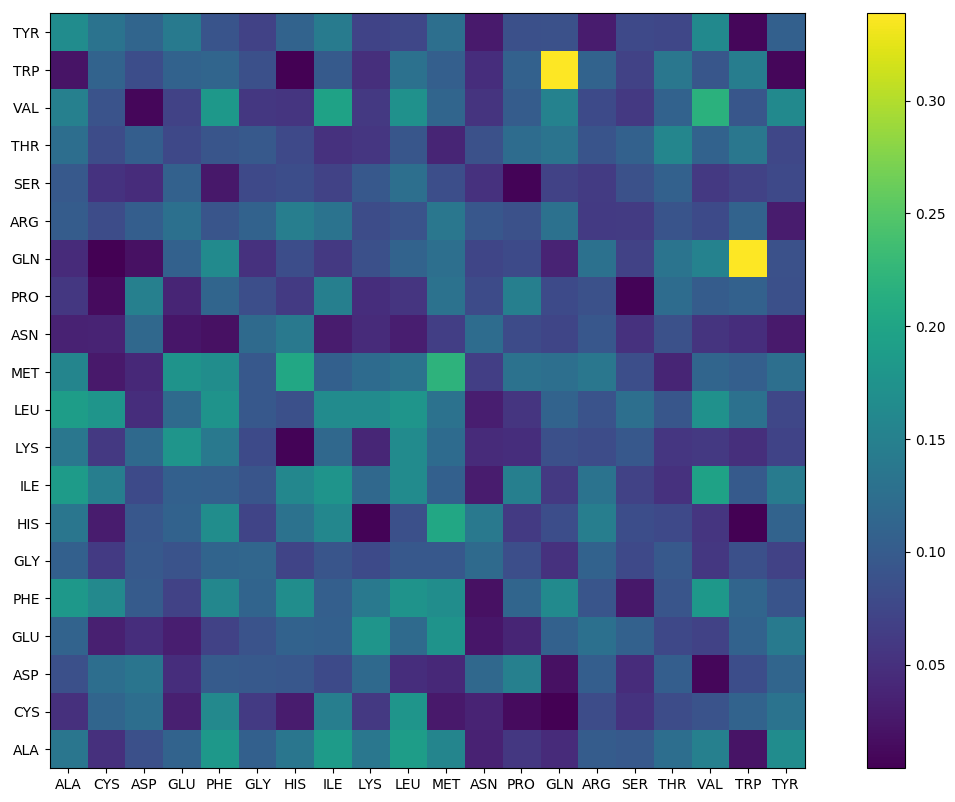

In [93]:
direct_contact_table = np.zeros((20,20)) - 1 
for i, line in result.iterrows():
    resi = line["Resi"]
    resj = line["Resj"]
    correct_ratio = line["correct_ratio"]
    direct_contact_table[d1_to_index[resi]][d1_to_index[resj]] = correct_ratio
    if resi != resj:
        direct_contact_table[d1_to_index[resj]][d1_to_index[resi]] = correct_ratio
plt.imshow(direct_contact_table, origin=0)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)
_ = plt.yticks(np.arange(20), aa3)

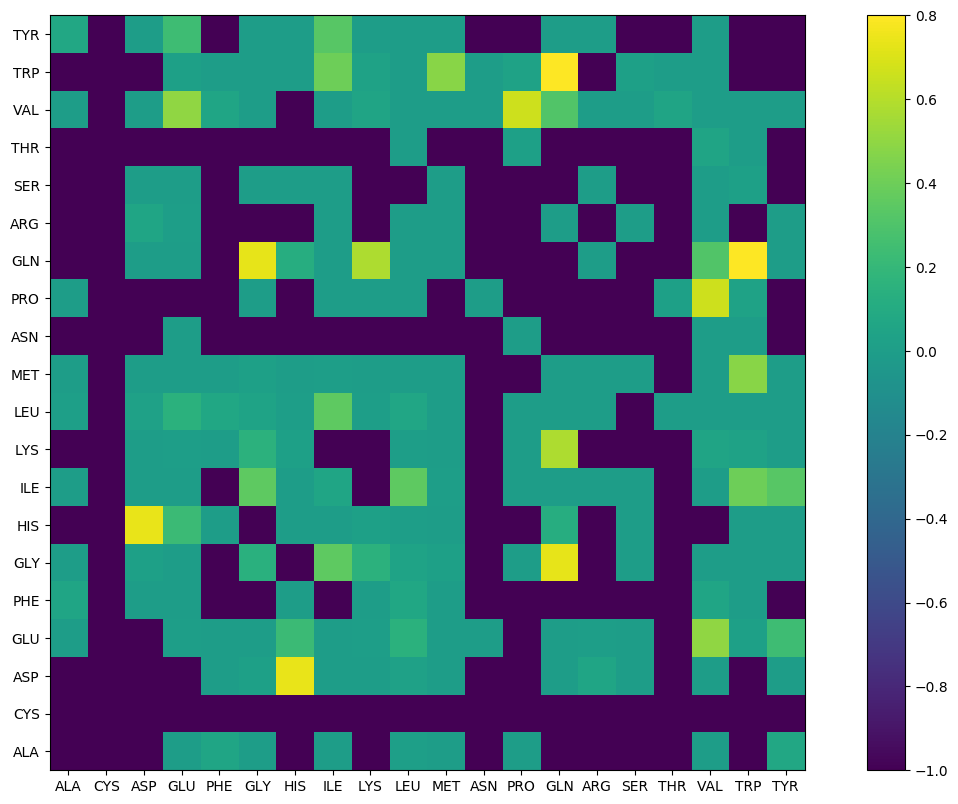

In [80]:
direct_contact_table = np.zeros((20,20)) - 1 
for i, line in result.iterrows():
    resi = line["Resi"]
    resj = line["Resj"]
    correct_ratio = line["correct_ratio"]
    direct_contact_table[d1_to_index[resi]][d1_to_index[resj]] = correct_ratio
    if resi != resj:
        direct_contact_table[d1_to_index[resj]][d1_to_index[resi]] = correct_ratio
plt.imshow(direct_contact_table, origin=0)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)
_ = plt.yticks(np.arange(20), aa3)

In [72]:
result.reset_index()

,Resi,Resj,with_in_cutoff,correct,n_decoy
0,A,A,0,0,50
1,A,D,0,0,100
2,A,E,0,0,250
3,A,G,5,0,100
4,A,H,0,0,100
...,...,...,...,...,...
222,Y,Q,2,0,300
223,Y,R,16,0,50
224,Y,S,0,0,50
225,Y,V,4,0,250


In [63]:
info.query("with_in_cutoff > 0")

,Protein,i,j,Resi,Resj,dis_native,dis0,dis1,dis2,dis3,...,dis42,dis43,dis44,dis45,dis46,dis47,dis48,dis49,with_in_cutoff,correct
1,2a0b,0,96,S,E,24.540379,8.589619,11.612119,9.520317,11.036819,...,10.001908,13.052809,15.719584,7.920152,8.285571,9.403168,8.631104,9.058750,3,0
2,2a0b,0,97,S,E,17.403204,8.989487,11.158300,9.647176,11.726250,...,7.322862,10.191383,9.798911,8.174930,8.526396,11.080670,11.505523,9.939404,2,0
4,2a0b,0,100,S,E,21.171255,4.933434,7.880610,5.016576,7.941772,...,4.796510,7.840240,10.343412,5.293333,5.680943,6.304268,5.815565,4.677626,33,0
6,2a0b,0,103,S,R,22.197365,8.802500,4.923718,7.762784,6.222366,...,8.946397,5.851907,11.568497,7.744026,7.826056,8.860541,5.331914,6.970852,15,0
7,2a0b,0,104,S,H,13.256738,7.489680,9.312119,7.424554,9.970190,...,6.583136,7.799269,9.691411,8.463796,7.372634,10.546615,9.840426,8.611886,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2a0b,79,91,I,V,5.729116,6.418045,8.555470,6.038908,8.960972,...,5.884872,5.512733,5.969506,6.249822,7.903872,5.836083,6.846112,5.806306,21,20
811,2a0b,79,94,I,W,6.115420,6.053108,6.264494,5.522557,9.787152,...,5.877768,5.688467,6.387781,6.113961,4.718327,5.912821,5.814579,6.234229,41,40
812,2a0b,79,95,I,I,5.385581,7.151258,8.017377,7.467034,7.508904,...,5.204203,6.583248,5.792931,7.581868,9.660872,4.388875,8.686253,5.543818,11,10
814,2a0b,79,98,I,M,4.980760,5.208953,6.010066,6.671427,6.100369,...,5.462386,9.703018,4.854737,7.726511,6.881110,6.241440,5.867614,6.434775,27,26


In [5]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_new_4_without_burial/1poa/1/lastFrame.pdb"
parser = PDBParser()
s = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)

In [47]:
structure = s
kappa=5.0
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)
sequence = get_sequence_from_structure(structure)
cb_density = calculate_cb_density(res_list, neighbor_list)
r_min_direct = 2.5
r_max_direct = 6.5
r_min = 6.5
r_max = 9.5
# kappa = 5.0
min_seq_sep = 10
density_threshold = 2.6
density_kappa = 7.0
# phi_mediated_contact_well = np.zeros((2, 20,20))
v_mediated = 0
data_ = []
for res1globalindex, res1 in enumerate(res_list):
    res1index = get_local_index(res1)
    res1chain = get_chain(res1)
    rho_i = cb_density[res1globalindex]
    for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
        res2index = get_local_index(res2)
        res2chain = get_chain(res2)
        res2globalindex = get_global_index(res_list, res2)
        rho_j = cb_density[res2globalindex]

        if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            res1type = get_res_type(res_list, res1)
            res2type = get_res_type(res_list, res2)
            rij = get_interaction_distance(res1, res2)
            theta = interaction_well(rij, r_min, r_max, kappa)
            water_theta = prot_water_switchFunc_sigmaWater(rho_i, rho_j, density_threshold, density_kappa) * theta
            protein_theta = prot_water_switchFunc_sigmaProt(rho_i, rho_j, density_threshold, density_kappa) * theta
            data_.append([res1.resname, res2.resname, "Protein", round(protein_theta, 3), res1globalindex, res2globalindex])
            data_.append([res1.resname, res2.resname, "Water", round(water_theta, 3), res1globalindex, res2globalindex])
            direct_theta = interaction_well(rij, r_min_direct, r_max_direct, kappa)
            data_.append([res1.resname, res2.resname, "Direct", round(direct_theta, 3), res1globalindex, res2globalindex])
            # protein_gamma = protein_gamma_ijm[0][res1type][res2type]*k_hypercharge
            # water_gamma = water_gamma_ijm[0][res1type][res2type]*k_hypercharge
data = pd.DataFrame(data_, columns=["Res1", "Res2", "Type", "Theta", "Index1", "Index2"])

In [4]:
def get_interaction_data(structure):
    # get all the pair of interaction, direct and mediated. as a dataFrame.
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    sequence = get_sequence_from_structure(structure)
    cb_density = calculate_cb_density(res_list, neighbor_list)
    r_min_direct = 2.5
    r_max_direct = 6.5
    r_min = 6.5
    r_max = 9.5
    kappa = 5.0
    min_seq_sep = 10
    density_threshold = 2.6
    density_kappa = 7.0
    # phi_mediated_contact_well = np.zeros((2, 20,20))
    v_mediated = 0
    data_ = []
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]

            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                theta = interaction_well(rij, r_min, r_max, kappa)
                water_theta = prot_water_switchFunc_sigmaWater(rho_i, rho_j, density_threshold, density_kappa) * theta
                protein_theta = prot_water_switchFunc_sigmaProt(rho_i, rho_j, density_threshold, density_kappa) * theta
                data_.append([res1.resname, res2.resname, "Protein", round(protein_theta, 3), res1globalindex, res2globalindex, rij])
                data_.append([res1.resname, res2.resname, "Water", round(water_theta, 3), res1globalindex, res2globalindex, rij])
                direct_theta = interaction_well(rij, r_min_direct, r_max_direct, kappa)
                data_.append([res1.resname, res2.resname, "Direct", round(direct_theta, 3), res1globalindex, res2globalindex, rij])
                # protein_gamma = protein_gamma_ijm[0][res1type][res2type]*k_hypercharge
                # water_gamma = water_gamma_ijm[0][res1type][res2type]*k_hypercharge
    data = pd.DataFrame(data_, columns=["Res1", "Res2", "Type", "Theta", "Index1", "Index2", "r"])

    # contact_gammas["Res1"] = contact_gammas.apply(lambda x: one_to_three(x["Res1"]), axis=1)
    # contact_gammas["Res2"] = contact_gammas.apply(lambda x: one_to_three(x["Res2"]), axis=1)
    # contact_gammas["Type"] = contact_gammas["Interaction"]
    # a = data.merge(contact_gammas, on=["Res1", "Res2", "Type"])
    # a["theta_gamma"] = a["Theta"] * a["Gamma"]
    return data


def get_contact_gamma_info(gammaFile):
    # check the gamma.
    # read in gamma, and sort by size.
    # gammaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_new_4_withoutBurial/saved_gammas/new_4_cutoff600_impose_Aprime_constraint"
    gamma = np.loadtxt(gammaFile)

    res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                            'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))
    c = 0
    info_ = []
    for i in range(20):
        for j in range(i, 20):
            info_.append(["Direct", res_type_map_letters[i], res_type_map_letters[j], c, round(gamma[c],3)])
            if i != j:
                info_.append(["Direct", res_type_map_letters[j], res_type_map_letters[i], c, round(gamma[c],3)])
            c += 1
    for i in range(20):
        for j in range(i, 20):
            info_.append(["Protein", res_type_map_letters[i], res_type_map_letters[j], c, round(gamma[c],3)])
            if i != j:
                info_.append(["Protein", res_type_map_letters[j], res_type_map_letters[i], c, round(gamma[c],3)])
            info_.append(["Water", res_type_map_letters[i], res_type_map_letters[j], c+210, round(gamma[c+210],3)])
            if i != j:
                info_.append(["Water", res_type_map_letters[j], res_type_map_letters[i], c+210, round(gamma[c+210],3)])
            c += 1
    contact_gammas = pd.DataFrame(info_, columns=["Interaction", "Res1", "Res2", "Index", "Gamma"])
    return contact_gammas

In [30]:
gammaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_larger_excl_withoutBurial/iter_larger_excl_withoutBurial_30"
contact_gammas = get_contact_gamma_info(gammaFile)

contact_gammas["Res1"] = contact_gammas.apply(lambda x: one_to_three(x["Res1"]), axis=1)
contact_gammas["Res2"] = contact_gammas.apply(lambda x: one_to_three(x["Res2"]), axis=1)
contact_gammas["Type"] = contact_gammas["Interaction"]

# pdb = "1sfp"
# pdb = "1who"
pdb = "1jon"
pdb = "1neu"
pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_1_stronger_exclude_withoutBurial/{pdb}/0/lastFrame.pdb"
parser = PDBParser()
structure = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)

a = data.merge(contact_gammas, on=["Res1", "Res2", "Type"])
a["theta_gamma"] = a["Theta"] * a["Gamma"]

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_1_stronger_exclude_withoutBurial/{pdb}/0/crystal_structure.pdb"
parser = PDBParser()
structure = parser.get_structure("X", pdbFile)
data_native = get_interaction_data(structure)

a_native = data_native.merge(contact_gammas, on=["Res1", "Res2", "Type"])
a_native["theta_gamma"] = a_native["Theta"] * a_native["Gamma"]

In [31]:
a[["Type", "theta_gamma"]].groupby("Type").sum()

,theta_gamma
Type,
Direct,-101.276373
Protein,-105.200971
Water,-1.311072


In [32]:
a_native[["Type", "theta_gamma"]].groupby("Type").sum()

,theta_gamma
Type,
Direct,-59.127062
Protein,-66.563254
Water,-4.710177


In [33]:
a[["Type", "theta_gamma"]].groupby("Type").sum().sum()

theta_gamma   -207.788416
dtype: float64

In [34]:
b2 = a.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].count().reset_index()
b2.sort_values("theta_gamma").tail(5)

,Res1,Res2,Type,theta_gamma
276,SER,VAL,Protein,7
264,SER,LYS,Protein,7
140,GLY,VAL,Protein,7
165,ILE,ILE,Direct,7
364,VAL,SER,Protein,8


In [35]:
b3 = a.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].sum().reset_index()
b3.sort_values("theta_gamma").head(5)

,Res1,Res2,Type,theta_gamma
165,ILE,ILE,Direct,-5.859840
54,ASP,LYS,Direct,-4.141928
181,ILE,VAL,Direct,-3.560194
171,ILE,PHE,Direct,-3.555981
29,ARG,PHE,Protein,-2.875323


In [36]:
b2_native = a_native.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].count().reset_index()
b2_native.sort_values("theta_gamma").tail(5)

,Res1,Res2,Type,theta_gamma
299,VAL,SER,Protein,5
142,ILE,PHE,Protein,5
137,ILE,ILE,Protein,5
307,VAL,VAL,Protein,5
172,PHE,ASP,Protein,6


In [37]:
b3_native = a_native.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].sum().reset_index()
b3_native.sort_values("theta_gamma").head(5)

,Res1,Res2,Type,theta_gamma
250,TRP,ILE,Direct,-4.199720
306,VAL,VAL,Direct,-3.221582
180,PHE,ILE,Direct,-2.645379
136,ILE,ILE,Direct,-2.453640
292,VAL,LEU,Direct,-2.448768


In [60]:
gammaFile = "/Users/weilu/Research/server/mar_2020/cath_dataset_shuffle_optimization/optimization_iter0_com_density_rmin_2p5/saved_gammas/iter0_cutoff600_impose_Aprime_constraint"
contact_gammas = get_contact_gamma_info(gammaFile)

contact_gammas["Res1"] = contact_gammas.apply(lambda x: one_to_three(x["Res1"]), axis=1)
contact_gammas["Res2"] = contact_gammas.apply(lambda x: one_to_three(x["Res2"]), axis=1)
contact_gammas["Type"] = contact_gammas["Interaction"]

pdb = "1sfp"
pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_0_stronger_exclude_volume/{pdb}/0/lastFrame.pdb"
parser = PDBParser()
structure = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)

a = data.merge(contact_gammas, on=["Res1", "Res2", "Type"])
a["theta_gamma"] = a["Theta"] * a["Gamma"]


In [61]:
a[["Type", "theta_gamma"]].groupby("Type").sum()

,theta_gamma
Type,
Direct,-71.788934
Protein,-11.780707
Water,-2.330682


In [62]:
b2 = a.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].count().reset_index()
b2.sort_values("theta_gamma").tail(5)

,Res1,Res2,Type,theta_gamma
111,GLY,TYR,Protein,5
134,ILE,LEU,Protein,6
132,ILE,ILE,Protein,6
130,ILE,GLY,Protein,6
146,ILE,VAL,Protein,6


In [20]:
b3 = a.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].sum().reset_index()
b3.sort_values("theta_gamma").head(5)

,Res1,Res2,Type,theta_gamma
19,CYS,CYS,Direct,-25.324650
149,VAL,LEU,Direct,-11.089641
20,CYS,CYS,Protein,-6.585576
26,CYS,LEU,Protein,-3.843926
104,PHE,CYS,Direct,-3.533796


In [25]:
fastaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_0_stronger_exclude_volume/3cyr/0/crystal_structure.fasta"
seq = read_fasta(fastaFile)

In [26]:
seq.count("C")

8

In [27]:
data = pd.read_csv("/Users/weilu/Research/server/mar_2020/mass_iterative_run/training_set.csv")
specific_decoys = data.query("Length < 150 and Length > 70").reset_index(drop=True)
pdb_list = specific_decoys["Protein"].to_list()
pdb_list = [a.lower() for a in pdb_list]
skip_pdb_list = ["1puc", "1skz"]
skip_pdb_list += ["1msc", "1fmb", "1gvp", "2tgi", "1whi", "1baj", "1rmd", "1div"]  #dimer.
skip_pdb_list += ["1aqe"]  # lots of ligand
filtered_pdb_list = [x for x in pdb_list if x not in skip_pdb_list]
pdb_list = filtered_pdb_list

In [65]:
info_ = []
for pdb in pdb_list:
    seq = np.loadtxt(f"/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/database/S20_seq/{pdb}.seq", dtype=str)
    seq = str(seq)
    info_.append([pdb, seq, seq.count("C"), len(seq)])

In [66]:
data = pd.DataFrame(info_, columns=["Protein", "Seq", "Count", "Length"])

In [67]:
data.to_csv("/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/cys_count_data.csv")

In [47]:
data["Length"] = data["Seq"].apply(lambda x:len(x))

In [70]:
print(data.sort_values("Count").query("Count >= 6")["Protein"].to_list())

['1by2', '1rcb', '1hyp', '3lzt', '3cyr', '7rsa', '1rzl', '1b6e', '1poc', '1bea', '1poa']


In [64]:
data

,Res1,Res2,Type,Theta,Index1,Index2,r
0,LEU,ALA,Protein,0.000,0,18,11.045428
1,LEU,ALA,Water,0.000,0,18,11.045428
2,LEU,ALA,Direct,0.000,0,18,11.045428
3,LEU,ARG,Protein,0.033,0,40,9.838098
4,LEU,ARG,Water,0.000,0,40,9.838098
...,...,...,...,...,...,...,...
3097,TYR,GLU,Water,0.000,89,101,15.198022
3098,TYR,GLU,Direct,0.000,89,101,15.198022
3099,ILE,TYR,Protein,0.000,90,100,10.454025
3100,ILE,TYR,Water,0.000,90,100,10.454025


In [20]:
gammaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_new_4_withoutBurial/saved_gammas/new_4_cutoff600_impose_Aprime_constraint"
contact_gammas = get_contact_gamma_info(gammaFile)

In [75]:
# contact_gammas["Res1"] = contact_gammas.apply(lambda x: one_to_three(x["Res1"]), axis=1)
# contact_gammas["Res2"] = contact_gammas.apply(lambda x: one_to_three(x["Res2"]), axis=1)
contact_gammas["Type"] = contact_gammas["Interaction"]
a = data.merge(contact_gammas, on=["Res1", "Res2", "Type"])
a["theta_gamma"] = a["Theta"] * a["Gamma"]

In [77]:
a["theta_gamma"] = a["Theta"] * a["Gamma"]

In [78]:
a[["Type", "theta_gamma"]].groupby("Type").sum()

,theta_gamma
Type,
Direct,-949.732540
Protein,-479.435681
Water,-8.402658


In [79]:
a["theta_gamma"].sum()

-1437.5708789999999

In [80]:
b2 = a.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].count().reset_index()

In [83]:
b3 = a.query("Theta > 0.1").groupby(["Res1", "Res2", "Type"])["theta_gamma"].sum().reset_index()

In [91]:
b3.sort_values("theta_gamma").head(200)["theta_gamma"].sum()

-1483.202181

In [96]:
a.query("Res1 == 'TYR' and Res2 == 'CYS' and Theta > 0.1 and Type =='Direct'").sort_values("r")

,Res1,Res2,Type,Theta,Index1,Index2,r,Interaction,Index,Gamma,theta_gamma
890,TYR,CYS,Direct,0.956,23,77,2.808838,Direct,88,-4.012,-3.835472
921,TYR,CYS,Direct,0.999,66,84,3.204737,Direct,88,-4.012,-4.007988
876,TYR,CYS,Direct,1.000,2,89,3.921630,Direct,88,-4.012,-4.012000
877,TYR,CYS,Direct,1.000,2,84,3.969086,Direct,88,-4.012,-4.012000
926,TYR,CYS,Direct,1.000,68,91,4.097748,Direct,88,-4.012,-4.012000
897,TYR,CYS,Direct,1.000,26,91,4.154008,Direct,88,-4.012,-4.012000
912,TYR,CYS,Direct,1.000,62,117,4.176590,Direct,88,-4.012,-4.012000
898,TYR,CYS,Direct,1.000,26,70,4.354343,Direct,88,-4.012,-4.012000
906,TYR,CYS,Direct,1.000,50,84,4.464048,Direct,88,-4.012,-4.012000
905,TYR,CYS,Direct,1.000,50,117,4.704973,Direct,88,-4.012,-4.012000


In [86]:
b3.sort_values("theta_gamma").head(20)

,Res1,Res2,Type,theta_gamma
342,TYR,CYS,Direct,-130.883476
321,TRP,CYS,Direct,-106.422800
113,CYS,TYR,Protein,-90.723716
343,TYR,CYS,Protein,-87.706208
112,CYS,TYR,Direct,-73.202952
320,TRP,ASN,Protein,-58.802645
226,MET,CYS,Direct,-50.142196
246,PHE,CYS,Direct,-32.165329
279,SER,CYS,Direct,-30.213630
188,ILE,TYR,Direct,-28.798753


In [69]:
b2.sort_values("theta_gamma").tail(10)

,Res1,Res2,Type,theta_gamma
87,CYS,ALA,Protein,18
112,CYS,TYR,Direct,19
320,TRP,ASN,Protein,19
336,TYR,ALA,Protein,20
357,TYR,TYR,Direct,22
343,TYR,CYS,Protein,28
113,CYS,TYR,Protein,29
321,TRP,CYS,Direct,30
342,TYR,CYS,Direct,34
94,CYS,CYS,Protein,45


In [82]:
a.query("Res1 == 'CYS' and Res2 == 'CYS' and Theta > 0.1")

,Res1,Res2,Type,Theta,Index1,Index2,r,Interaction,Index,Gamma,theta_gamma
3153,CYS,CYS,Protein,1.000,10,25,7.411365,Protein,284,-0.477,-0.477000
3154,CYS,CYS,Protein,0.987,10,59,9.068994,Protein,284,-0.477,-0.470799
3155,CYS,CYS,Protein,1.000,10,27,7.557992,Protein,284,-0.477,-0.477000
3157,CYS,CYS,Protein,1.000,10,84,8.094460,Protein,284,-0.477,-0.477000
3158,CYS,CYS,Protein,0.938,10,77,6.771117,Protein,284,-0.477,-0.447426
3159,CYS,CYS,Protein,0.998,10,43,7.104249,Protein,284,-0.477,-0.476046
3160,CYS,CYS,Protein,0.999,10,42,8.782217,Protein,284,-0.477,-0.476523
3161,CYS,CYS,Protein,0.678,10,91,9.425323,Protein,284,-0.477,-0.323406
3162,CYS,CYS,Protein,0.288,25,59,9.590501,Protein,284,-0.477,-0.137376
3163,CYS,CYS,Protein,0.976,25,98,9.128296,Protein,284,-0.477,-0.465552


In [56]:
a.sort_values("theta_gamma")

,Res1,Res2,Type,Theta,Index1,Index2,Interaction,Index,Gamma,theta_gamma
1904,GLN,HIS,Direct,1.000,9,46,Direct,93,-4.963,-4.963000
2490,MET,CYS,Direct,1.000,7,84,Direct,82,-4.654,-4.654000
2501,MET,CYS,Direct,1.000,7,43,Direct,82,-4.654,-4.654000
2499,MET,CYS,Direct,1.000,7,25,Direct,82,-4.654,-4.654000
2491,MET,CYS,Direct,0.999,7,42,Direct,82,-4.654,-4.649346
...,...,...,...,...,...,...,...,...,...,...
149,ASN,ASN,Direct,0.960,0,112,Direct,39,1.119,1.074240
5023,SER,THR,Direct,1.000,32,74,Direct,196,1.075,1.075000
6450,ASP,TRP,Protein,0.998,19,60,Protein,281,1.097,1.094806
3316,CYS,CYS,Direct,1.000,25,89,Direct,74,2.484,2.484000


In [4]:
from Bio.PDB.Polypeptide import d1_to_index
from Bio.PDB.Polypeptide import dindex_to_1

pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
def get_contact_info(pdbFile, seq, frame_index=0):
    # frame_index = 0
    cutoff = 9.5
    MAX_OFFSET = 9
    parser = PDBParser()
    structure = parser.get_structure("x", pdbFile)
    models = list(structure.get_models())
    model = models[frame_index]
    all_residues = list(model.get_residues())
    info_ = []
    for i, res1 in enumerate(all_residues):
        if seq[i] == "G":
            a1 = res1["CA"]
        else:
            a1 = res1["CB"]
        for j, res2 in enumerate(all_residues):
            if seq[j] == "G":
                a2 = res2["CA"]
            else:
                a2 = res2["CB"]
            dis = a1 - a2
            if dis < cutoff and j - i > MAX_OFFSET:
                info_.append([pdb, i, j, seq[i], seq[j], dis])
    info = pd.DataFrame(info_, columns=["Protein", "i", "j", "Resi", "Resj", "Dis"])
    return info

In [82]:
data = pd.read_csv("training_set.csv")
specific_decoys = data.query("Length < 150 and Length > 70").reset_index(drop=True)
pdb_list = specific_decoys["Protein"].to_list()
pdb_list = [a.lower() for a in pdb_list]
skip_pdb_list = ["1puc", "1skz"]
skip_pdb_list += ["1msc", "1fmb", "1gvp", "2tgi", "1whi", "1baj", "1rmd", "1div"]  #dimer.
skip_pdb_list += ["1aqe"]  # lots of ligand
filtered_pdb_list = [x for x in pdb_list if x not in skip_pdb_list]
pdb_list = filtered_pdb_list

In [9]:
info_ = []
for pdb in pdb_list:
    pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
    seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
    info = get_contact_info(pdbFile, seq)
    info_.append(info)
info = pd.concat(info_)

In [14]:
direct_contact_table = np.zeros((20,20))
for i, line in info.iterrows():
    resi = line["Resi"]
    resj = line["Resj"]
    dis = line["Dis"]
    if dis < 6.5:
        direct_contact_table[d1_to_index[resi]][d1_to_index[resj]] += 1
        if resi != resj:
            direct_contact_table[d1_to_index[resj]][d1_to_index[resi]] += 1

In [16]:
direct_contact_table.min()

3.0

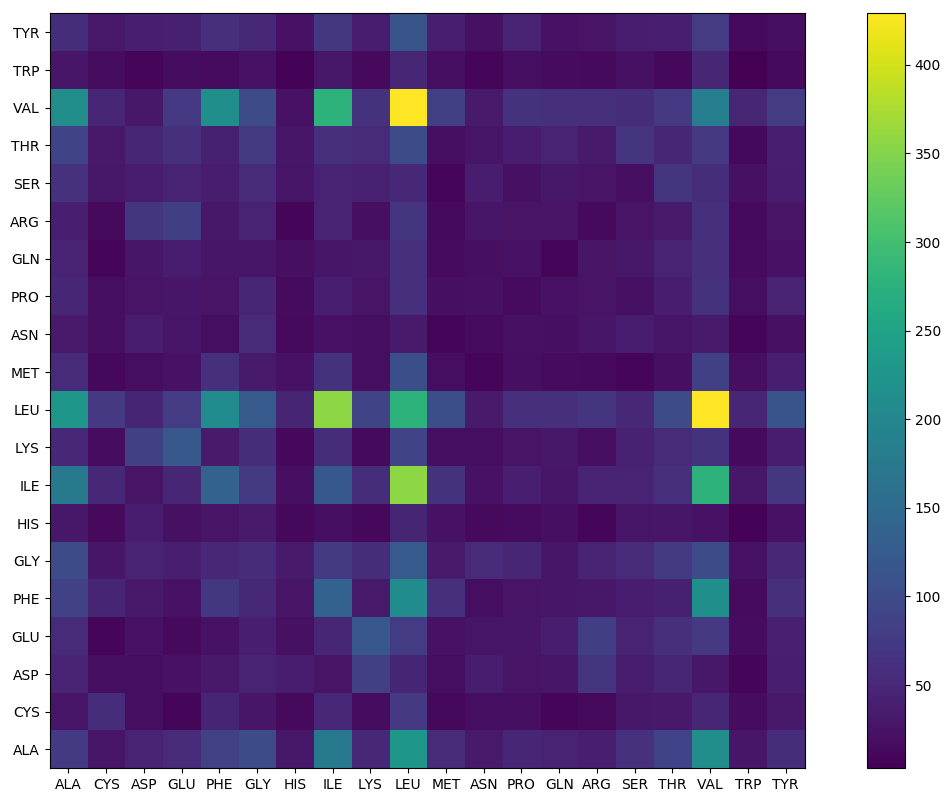

In [15]:
plt.imshow(direct_contact_table, origin=0)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)
_ = plt.yticks(np.arange(20), aa3)

In [11]:
contact_table = np.zeros((20,20))
for i, line in info.iterrows():
    resi = line["Resi"]
    resj = line["Resj"]
    dis = line["Dis"]
    contact_table[d1_to_index[resi]][d1_to_index[resj]] += 1
    if resi != resj:
        contact_table[d1_to_index[resj]][d1_to_index[resi]] += 1

In [12]:
len(info)

32267

In [13]:
contact_table.min()

12.0

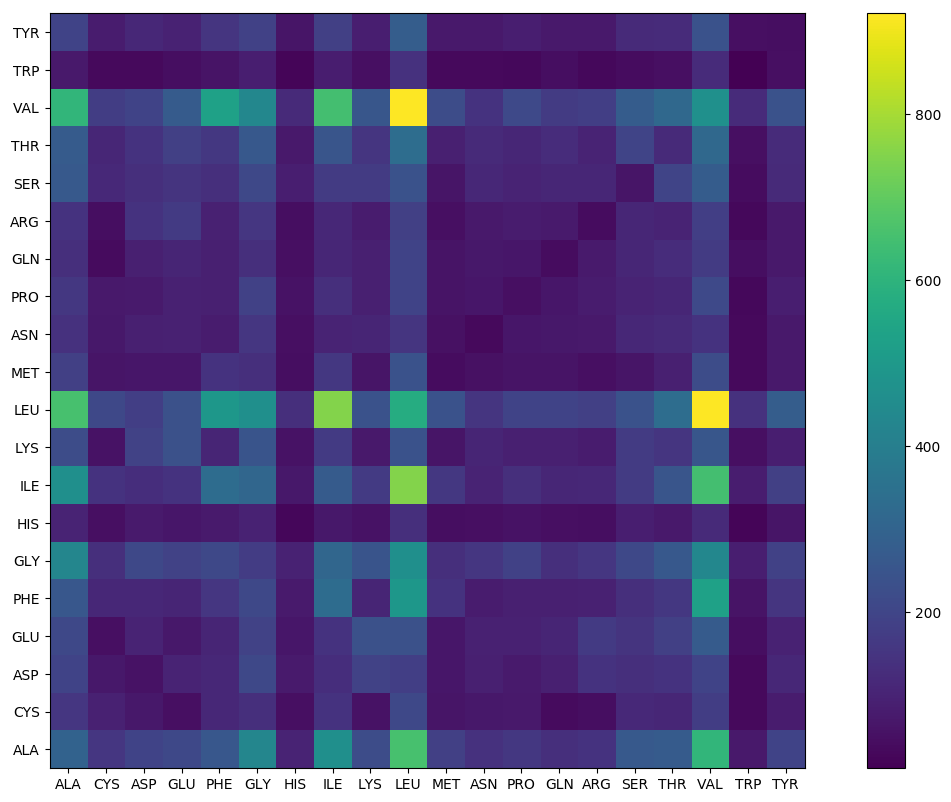

In [115]:
plt.imshow(contact_table, origin=0)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)
_ = plt.yticks(np.arange(20), aa3)

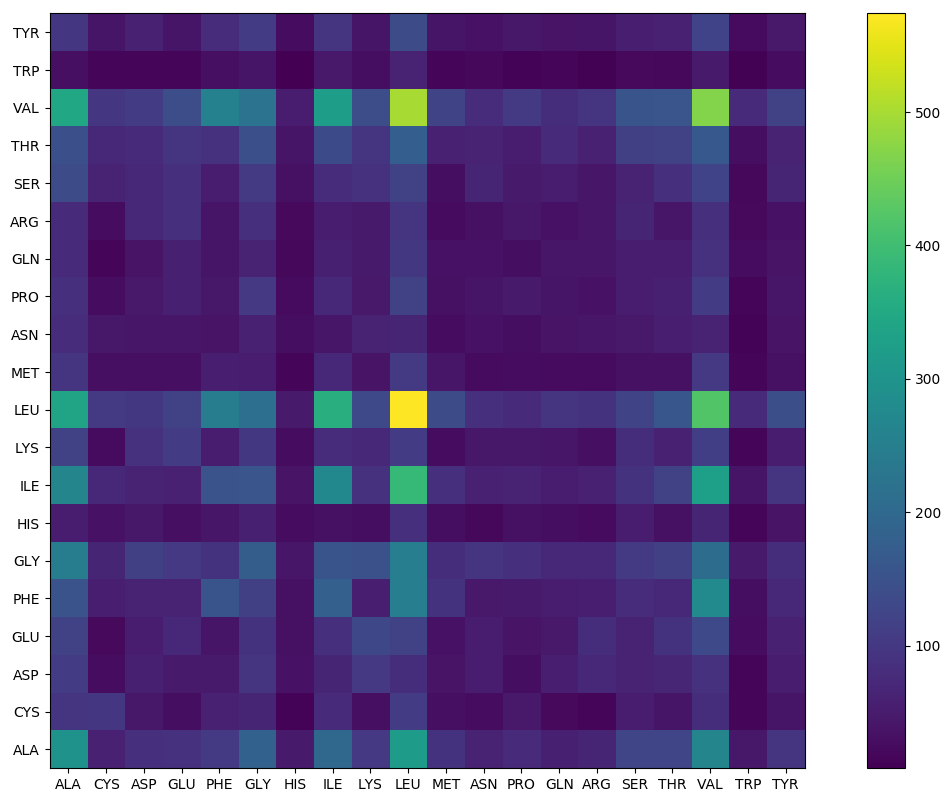

In [109]:
plt.imshow(contact_table, origin=0)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)
_ = plt.yticks(np.arange(20), aa3)

In [88]:
info.groupby(["Resi", "Resj"])["Dis"].count()

Resi  Resj
A     A       297
      C        60
      D        87
      E        88
      F       105
             ... 
Y     S        55
      T        61
      V       122
      W        24
      Y        46
Name: Dis, Length: 400, dtype: int64

In [81]:

pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
get_contact_info(pdbFile, seq)

,Protein,i,j,Resi,Resj,Dis
0,2a0b,1,104,K,H,5.800971
1,2a0b,1,105,K,D,8.981970
2,2a0b,1,108,K,V,4.504978
3,2a0b,1,111,K,A,8.126446
4,2a0b,2,108,S,V,5.637322
...,...,...,...,...,...,...
267,2a0b,79,94,I,W,6.115420
268,2a0b,79,95,I,I,5.385581
269,2a0b,79,98,I,M,4.980760
270,2a0b,81,94,S,W,8.732571


In [78]:
from Bio.PDB.Polypeptide import d1_to_index
from Bio.PDB.Polypeptide import dindex_to_1

pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")

frame_index = 0
cutoff = 9.5
MAX_OFFSET = 9
parser = PDBParser()
structure = parser.get_structure("x", pdbFile)
models = list(structure.get_models())
model = models[frame_index]
all_residues = list(model.get_residues())
info_ = []
for i, res1 in enumerate(all_residues):
    if seq[i] == "G":
        a1 = res1["CA"]
    else:
        a1 = res1["CB"]
    for j, res2 in enumerate(all_residues):
        if seq[j] == "G":
            a2 = res2["CA"]
        else:
            a2 = res2["CB"]
        dis = a1 - a2
        if dis < cutoff and j - i > MAX_OFFSET:
            info_.append([pdb, i, j, seq[i], seq[j], dis])


In [6]:
def getContactMapFromPDB(pdbFile, seq, frame_index=0):
    cutoff = 9.5
    MAX_OFFSET = 9
    parser = PDBParser()
    structure = parser.get_structure("x", pdbFile)
    models = list(structure.get_models())
    model = models[frame_index]
    all_residues = list(model.get_residues())
    n = len(all_residues)
    contact_table = np.zeros((n,n))
    # print(pdb, n)#
    for i, res1 in enumerate(all_residues):
        if seq[i] == "G":
            a1 = res1["CA"]
        else:
            a1 = res1["CB"]
        for j, res2 in enumerate(all_residues):
            if seq[j] == "G":
                a2 = res2["CA"]
            else:
                a2 = res2["CB"]
            contact_table[i][j] = a1 - a2

    data = (contact_table < cutoff)
    remove_band = np.eye(n)
    for i in range(1, MAX_OFFSET):
        remove_band += np.eye(n, k=i)
        remove_band += np.eye(n, k=-i)
    data[remove_band==1] = 0
    return data

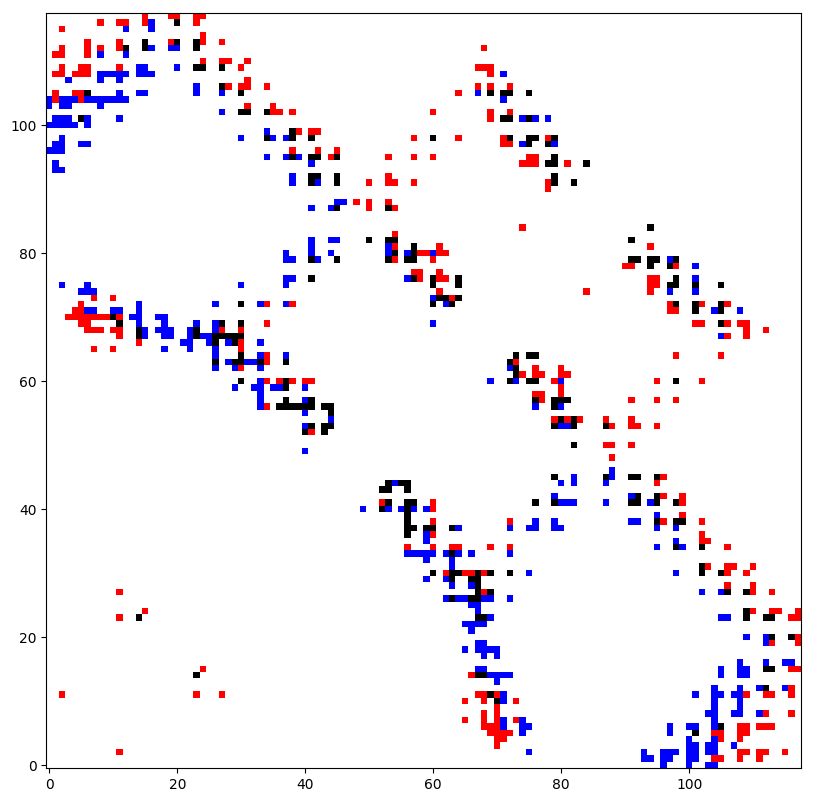

In [81]:
pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
# pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/{pdb}/0/movie.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
data_native = getContactMapFromPDB(pdbFile, seq, frame_index=-1)

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/{pdb}/0/lastFrame.pdb"
# pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/test/native.pdb"
data_predicted = getContactMapFromPDB(pdbFile, seq, frame_index=-1)

combined = data_native + data_predicted * 2
from matplotlib import colors
# white means not present in both
# red means present in the first but not the second
# blue means present in the second but not the first
# black means present in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)




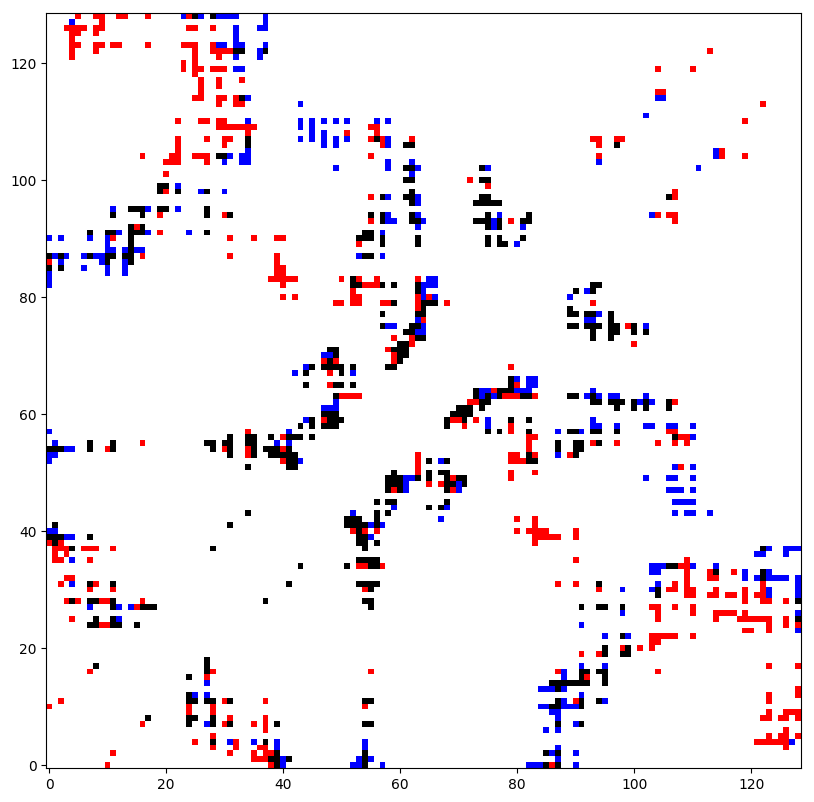

In [7]:
pdb = "3lzt"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
data_native = getContactMapFromPDB(pdbFile, seq)

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/{pdb}/0/lastFrame.pdb"
# pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/test/native.pdb"
data_predicted = getContactMapFromPDB(pdbFile, seq, frame_index=-1)

combined = data_native + data_predicted * 2
from matplotlib import colors
# white means not present in both
# red means present in the first but not the second
# blue means present in the second but not the first
# black means present in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)



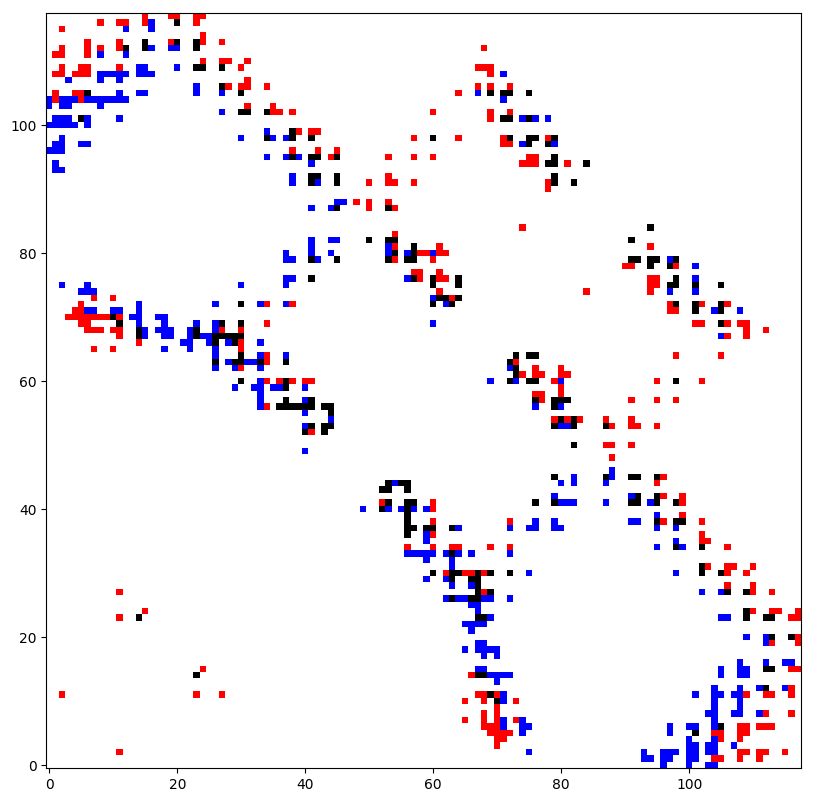

In [66]:
pdb = "2a0b"

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/cbd-openmmawsem.pdb"
seq = read_fasta(f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/{pdb}/crystal_structure.fasta")
data_native = getContactMapFromPDB(pdbFile, seq)

pdbFile = f"/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/{pdb}/0/lastFrame.pdb"
# pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/test/native.pdb"
data_predicted = getContactMapFromPDB(pdbFile, seq, frame_index=-1)

combined = data_native + data_predicted * 2
from matplotlib import colors
# white means not present in both
# red means present in the first but not the second
# blue means present in the second but not the first
# black means present in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)


In [58]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/1baj/cbd-openmmawsem.pdb"
seq = read_fasta("/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/1baj/crystal_structure.fasta")
data_native = getContactMapFromPDB(pdbFile, seq)

In [63]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/1baj/0/lastFrame.pdb"
# pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/test/native.pdb"
data_predicted = getContactMapFromPDB(pdbFile, seq, frame_index=-1)

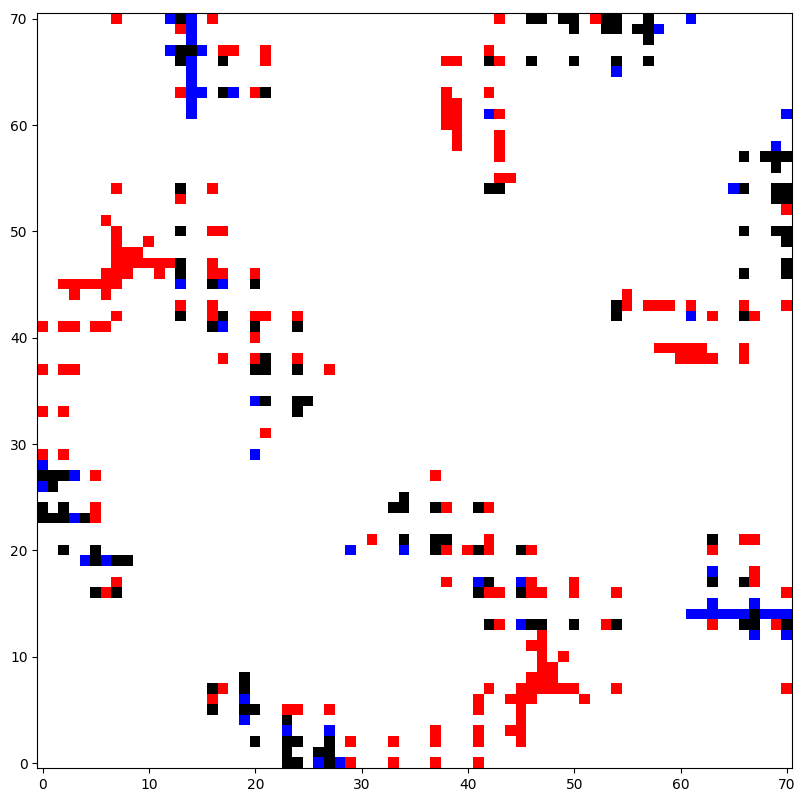

In [64]:
combined = data_native + data_predicted * 2
from matplotlib import colors
# white means not present in both
# red means present in the first but not the second
# blue means present in the second but not the first
# black means present in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)

In [56]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_start_native_iter5/1baj/0/native.pdb"
seq = read_fasta("/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/1baj/crystal_structure.fasta")
frame_index = 0
cutoff = 9.5
MAX_OFFSET = 9
parser = PDBParser()
structure = parser.get_structure("x", pdbFile)
models = list(structure.get_models())
model = models[frame_index]
all_residues = list(model.get_residues())
n = len(all_residues)
contact_table = np.zeros((n,n))
# print(pdb, n)#
for i, res1 in enumerate(all_residues):
    if seq[i] == "G":
        a1 = res1["CA"]
    else:
        a1 = res1["CB"]
    for j, res2 in enumerate(all_residues):
        if seq[j] == "G":
            a2 = res2["CA"]
        else:
            a2 = res2["CB"]
        contact_table[i][j] = a1 - a2

data = (contact_table < cutoff)
remove_band = np.eye(n)
for i in range(1, MAX_OFFSET):
    remove_band += np.eye(n, k=i)
    remove_band += np.eye(n, k=-i)
data[remove_band==1] = 0

[<Model id=0>, <Model id=1>]

In [23]:
three_to_one("TRP")

'W'

In [25]:
seq.count("W")

1

In [ ]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/1baj/cbd-openmmawsem.pdb"

cutoff = 9.5
MAX_OFFSET = 9
parser = PDBParser()
structure = parser.get_structure("x", pdbFile)
all_residues = list(structure.get_residues())
n = len(all_residues)
contact_table = np.zeros((n,n))
# print(pdb, n)#
for i, res1 in enumerate(all_residues):
    for j, res2 in enumerate(all_residues):
        contact_table[i][j] = res1["CA"]-res2["CA"]

data = (contact_table < cutoff)
remove_band = np.eye(n)
for i in range(1, MAX_OFFSET):
    remove_band += np.eye(n, k=i)
    remove_band += np.eye(n, k=-i)
data[remove_band==1] = 0
data_ca = data

In [11]:
fileLocation = "/Users/weilu/Research/server/feb_2020/SPOT-Contact-Helical-New/outputs/tmp.spotcon"
data = pd.read_csv(fileLocation, skiprows=5, sep="\s+", names=["i","j","p"]).dropna().reset_index(drop=True)

data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
data_A = data

In [12]:
fileLocation = "/Users/weilu/Research/server/feb_2020/SPOT-Contact-Helical-New/outputs/original.spotcon"
data = pd.read_csv(fileLocation, skiprows=5, sep="\s+", names=["i","j","p"]).dropna().reset_index(drop=True)

data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
data_original = data

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data_original.dtypes

i      int64
j      int64
p    float64
dtype: object

In [15]:
data_A.dtypes

i      int64
j      int64
p    float64
dtype: object

In [17]:
seq = "MSKLTTGSFSIEDLESVQITINNIVGAAKEAAEEKEKELVNAGPTLFPGLEGYRDDWNFKLLDRYEPVITPMCDQCCYCTYGPCDLSGNKRGACGIDMKGHNGREFFLRVITGTACHAAHGRHLLDHLIEKYGEDLPLTLGQSNVLTPNITISTGLSPKTLGEVKPAMEYVEEQLTQLLATVHAGQESAEIDYDSKALFSGSLDHVGMEISDIVQVAAYDFPKADPEAPLVEIGMGTIDKSKPFLCVIGHNVAGVTYMMDYMEDNNLTDKMEIAGLCCTAIDLTRYKEADRRPPYAKVIGSMSKELKVIRSGMPDVIVVDEQCVRGDIVPEAQKLKIPVIASNPKIMYGLPNRTDADVDETMEELKSGKIPGCVMLDYDKLGELCVRLTMEMAPIRDAAGITALPTDEELVNMVAKCADCGACLLACPEEIDIPEAMGFAKKGDFSYFEEIHDTCIGCRRCEQVCKKEIPILNVIEKIAQKQIAEEKGLMRAGRGQVSDAEIRAEGLNLVMGTTPGIIAIIGCPNYAGGTKDVYYIAEEFLKRNFIVVTTGCGAMDIGMFKDADGKTLYERFPGGFQCGGLANIGSCVSNAHITGAAEKVAAIFAQRTLEGNLAEIGDYILNRVGACGLAWGAFSQKASSIGTGCNIFGIPAVLGPHSSKYRRALIAKTYEEDKWKVYDARNGQEMPIPPAPEFLLTTAETWQEAIPMMAKACIRPSDNSMGRAIKLTHWMELHKKYLGGKEPEDWWKFVRTEADLPLATREALLKELEKEHGWEIDWKRKKIISGPKIKFDVSAQPTNLKRLCKEA"

In [18]:
len(seq)

807

In [33]:
seq

'MSKLTTGSFSIEDLESVQITINNIVGAAKEAAEEKEKELVNAGPTLFPGLEGYRDDWNFKLLDRYEPVITPMCDQCCYCTYGPCDLSGNKRGACGIDMKGHNGREFFLRVITGTACHAAHGRHLLDHLIEKYGEDLPLTLGQSNVLTPNITISTGLSPKTLGEVKPAMEYVEEQLTQLLATVHAGQESAEIDYDSKALFSGSLDHVGMEISDIVQVAAYDFPKADPEAPLVEIGMGTIDKSKPFLCVIGHNVAGVTYMMDYMEDNNLTDKMEIAGLCCTAIDLTRYKEADRRPPYAKVIGSMSKELKVIRSGMPDVIVVDEQCVRGDIVPEAQKLKIPVIASNPKIMYGLPNRTDADVDETMEELKSGKIPGCVMLDYDKLGELCVRLTMEMAPIRDAAGITALPTDEELVNMVAKCADCGACLLACPEEIDIPEAMGFAKKGDFSYFEEIHDTCIGCRRCEQVCKKEIPILNVIEKIAQKQIAEEKGLMRAGRGQVSDAEIRAEGLNLVMGTTPGIIAIIGCPNYAGGTKDVYYIAEEFLKRNFIVVTTGCGAMDIGMFKDADGKTLYERFPGGFQCGGLANIGSCVSNAHITGAAEKVAAIFAQRTLEGNLAEIGDYILNRVGACGLAWGAFSQKASSIGTGCNIFGIPAVLGPHSSKYRRALIAKTYEEDKWKVYDARNGQEMPIPPAPEFLLTTAETWQEAIPMMAKACIRPSDNSMGRAIKLTHWMELHKKYLGGKEPEDWWKFVRTEADLPLATREALLKELEKEHGWEIDWKRKKIISGPKIKFDVSAQPTNLKRLCKEA'

In [61]:
n = len(seq)
t = np.zeros((n,n))
for index, d in data_A.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p


In [72]:
data_s = data.astype(int)
t_s = (t>0.08).astype(float)
combined = data_s + t_s * 2
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)

ValueError: operands could not be broadcast together with shapes (766,766) (807,807) 

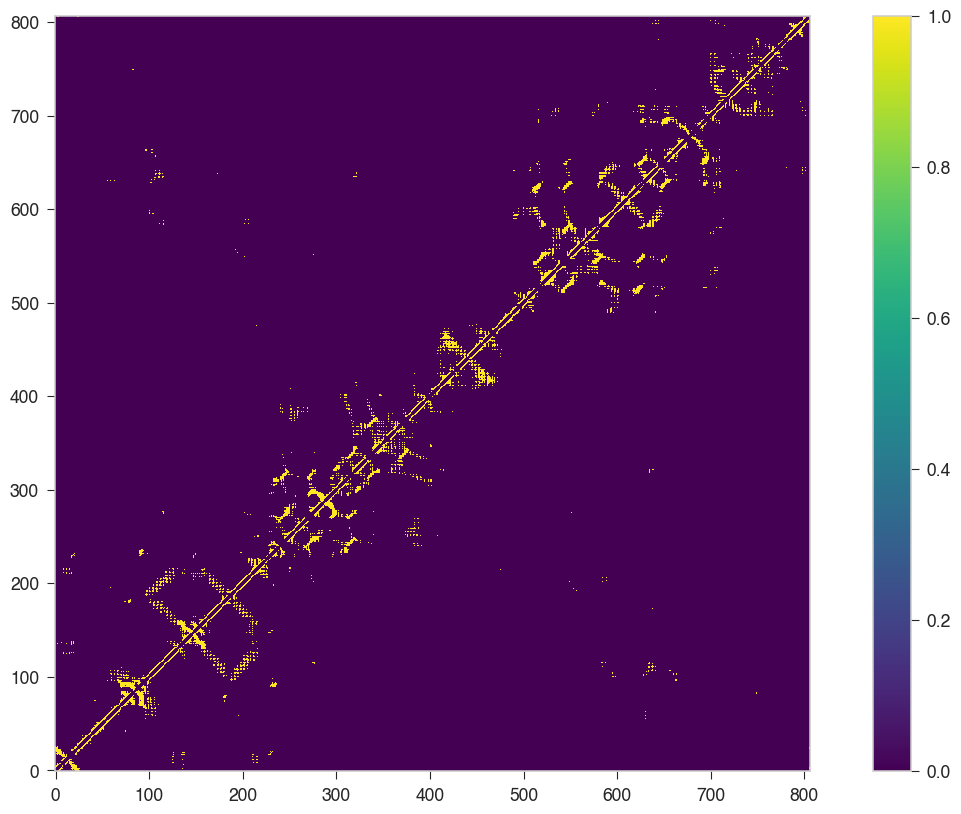

In [71]:
plt.imshow((t>0.08).astype(float), origin="bottom")
plt.colorbar()

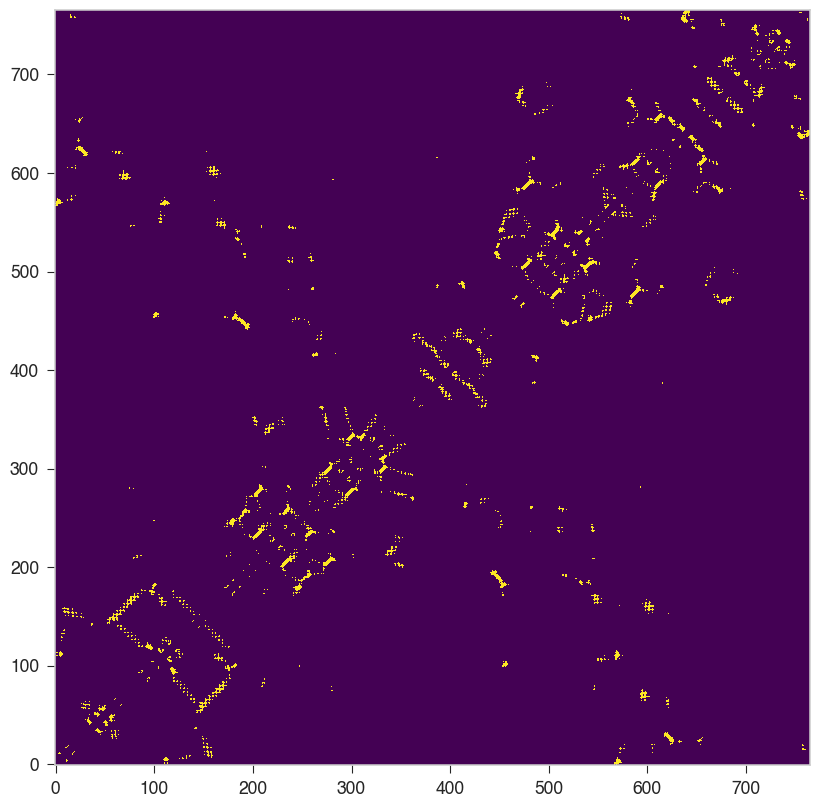

In [70]:
plt.imshow(data, origin="bottom")

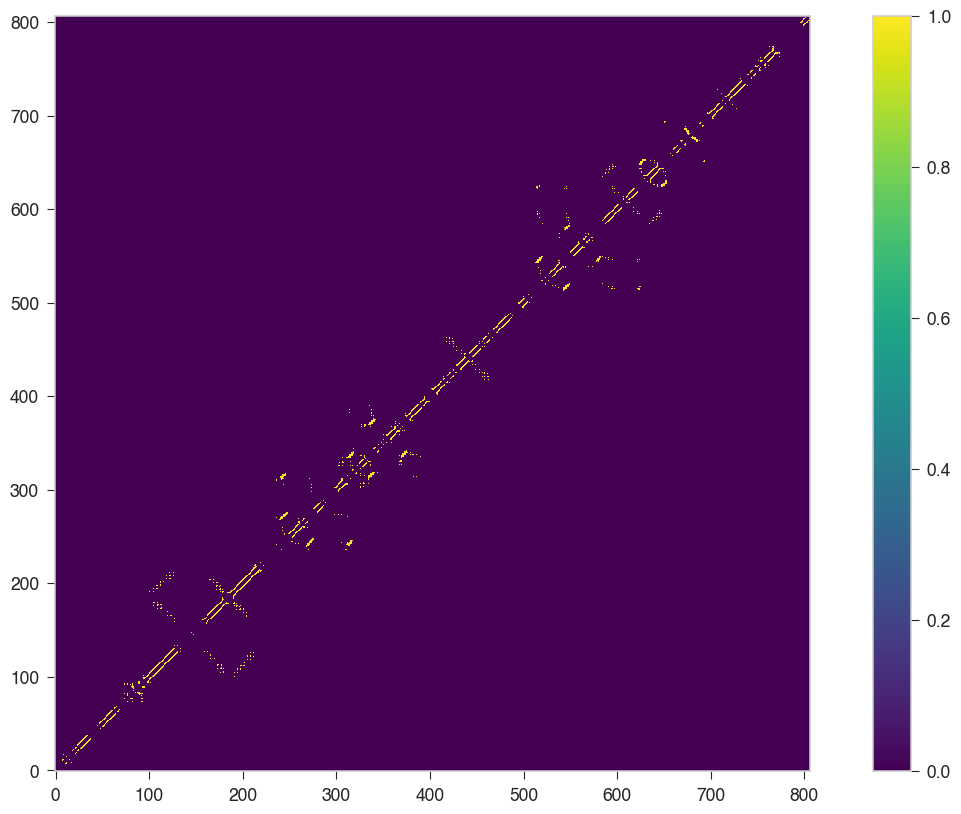

In [20]:
plt.imshow((t>0.5).astype(float), origin="bottom")
plt.colorbar()

In [21]:
n = len(seq)
t = np.zeros((n,n))
for index, d in data_original.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p


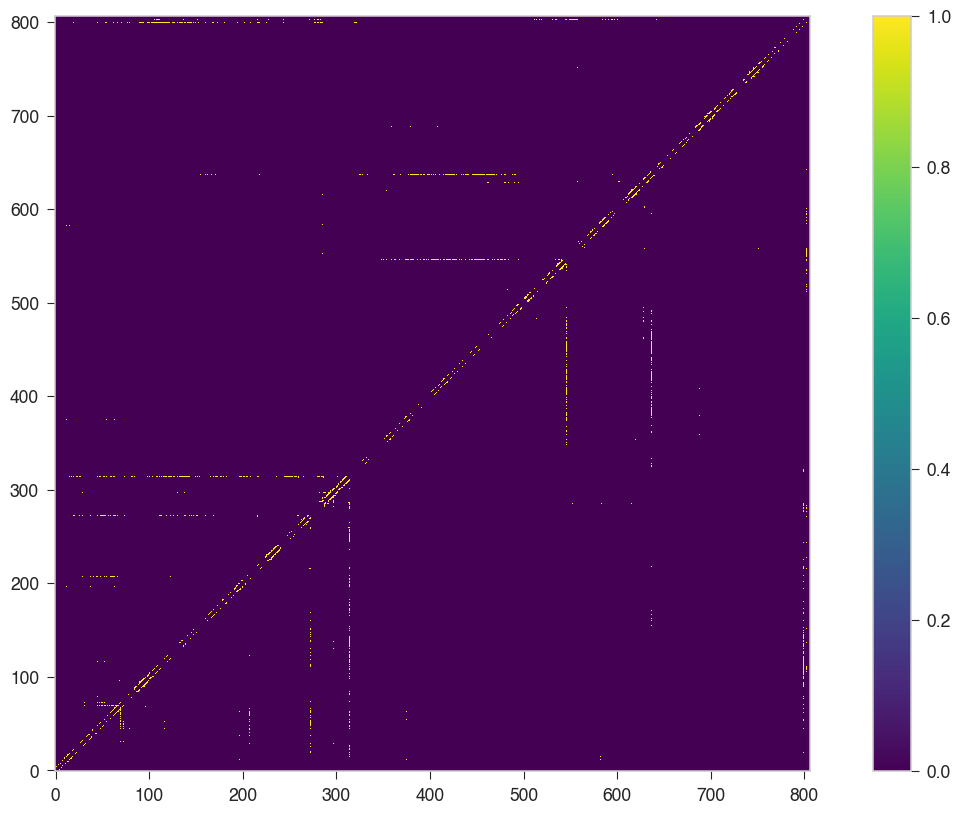

In [26]:
plt.imshow((t>0.1).astype(float), origin="bottom")
plt.colorbar()

In [7]:
len(a[5])

51

In [22]:
pdb = "4rws"
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/A.txt"
data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
data_A = data
seq_A = getSeqFromRaptorXContact(fileLocation)

fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/B.txt"
data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
data_B = data
seq_B = getSeqFromRaptorXContact(fileLocation)


In [86]:
import textwrap
header = '''\
PFRMAT RR
TARGET {}
AUTHOR RaptorX-Contact
METHOD deep dilated residual networks (one variant of deep CNN). Consult jinboxu@gmail.com for details.
MODEL 1
'''
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/{pdb}.txt"
with open(fileLocation, "w") as out:
    out.write(header.format(pdb))
    out.write("\n".join(textwrap.wrap(seq, width=50))+"\n")
    for index, d in data_A.iterrows():
    #     print(index)
        i = int(d["i"])
        j = int(d["j"])
        p = round(d["p"], 8)
        s = int(d["s"])
        ss = int(d["ss"])
        out.write(f"{i} {j} {s} {ss} {p}\n")
    for index, d in data_B.iterrows():
    #     print(index)
        i = int(d["i"]) + len(seq_A)
        j = int(d["j"]) + len(seq_A)
        p = round(d["p"], 8)
        s = int(d["s"])
        ss = int(d["ss"])
        out.write(f"{i} {j} {s} {ss} {p}\n")
    out.write("END\n")

In [80]:
for index, d in data_B.iterrows():
#     print(index)
    i = int(d["i"]) - 1 + len(seq_A)
    j = int(d["j"]) - 1 + len(seq_A)
    p = round(d["p"], 8)
    s = int(d["s"])
    ss = int(d["ss"])

In [84]:
data_A

,i,j,s,ss,p
0,34,59,0.0,8.0,0.997731
1,38,56,0.0,8.0,0.980999
2,41,52,0.0,8.0,0.973823
3,38,59,0.0,8.0,0.966630
4,27,66,0.0,8.0,0.962626
5,34,62,0.0,8.0,0.961573
6,35,59,0.0,8.0,0.916884
7,41,55,0.0,8.0,0.895539
8,31,63,0.0,8.0,0.874988
9,30,62,0.0,8.0,0.842116


In [79]:
round(p, 8)

0.0023355

In [23]:
seq = seq_A + seq_B

In [26]:
seq

'SMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVWILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICCRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSGHQKRKALKPTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYALGASCHRPDKCCLGYQKRPLPQVLLSSWYPTSQLCSKPGVIFLTKRGRQVCADKSKDWVKKLMQQLPVTA'

In [27]:
n = len(seq)
t = np.zeros((n,n))
for index, d in data_A.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p
for index, d in data_B.iterrows():
#     print(index)
    i = int(d["i"]) - 1 + len(seq_A)
    j = int(d["j"]) - 1 + len(seq_A)
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p

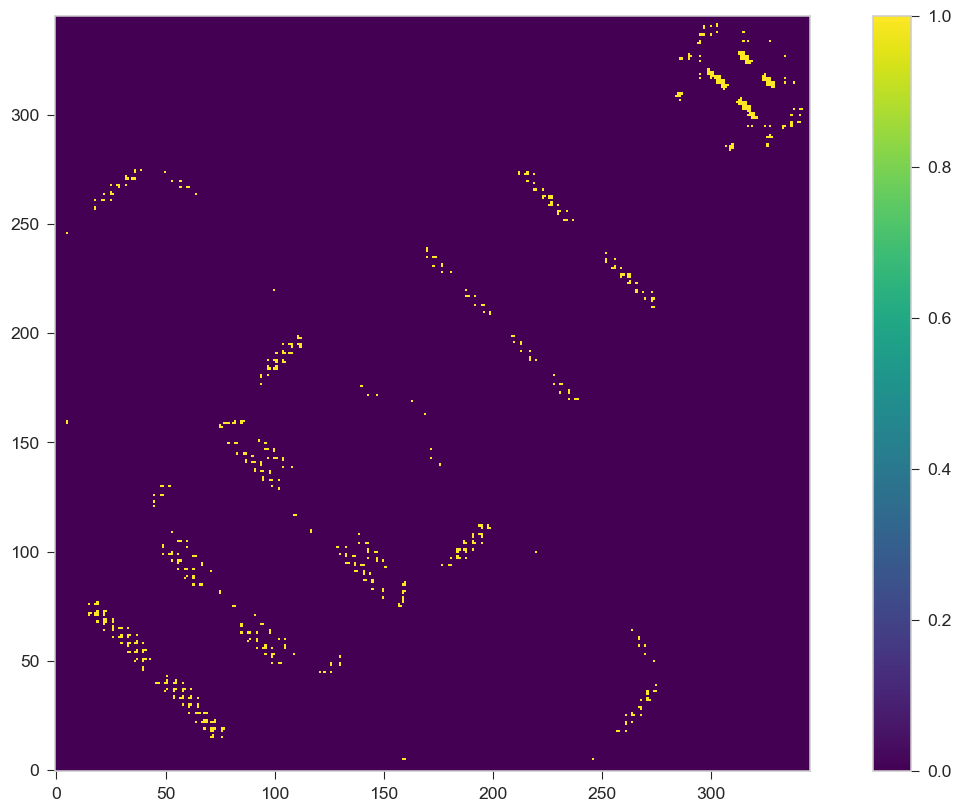

In [28]:
plt.imshow((t>0.5).astype(float), origin="bottom")
plt.colorbar()

In [29]:
def getSeqFromRaptorXContact(fileLocation):
    with open(fileLocation) as f:
        a = f.readlines()
    i = 4
    seq = ""
    assert a[i] == "MODEL 1\n"
    i += 1
    while True:
        line = a[i]
        if line[0].isdigit():
            break
        i += 1
        seq += line.strip()
    # print(i)
    return seq
def getContactMapFromPDB(pdbFile):
    cutoff = 9.5
    MAX_OFFSET = 6
    parser = PDBParser()
    structure = parser.get_structure('target', pdbFile)
    all_residues = list(structure.get_residues())
    n = len(all_residues)
    contact_table = np.zeros((n,n))
    # print(pdb, n)#
    for i, res1 in enumerate(all_residues):
        for j, res2 in enumerate(all_residues):
            contact_table[i][j] = res1["CA"]-res2["CA"]

    data = (contact_table < cutoff)
    remove_band = np.eye(n)
    for i in range(1, MAX_OFFSET):
        remove_band += np.eye(n, k=i)
        remove_band += np.eye(n, k=-i)
    data[remove_band==1] = 0
    return data

In [53]:
pdbFile = "/Users/weilu/Research/server/feb_2020/SPOT-Contact-Helical-New/outputs/3cf4_A.pdb"
cutoff = 9.5
MAX_OFFSET = 6
parser = PDBParser()
structure = parser.get_structure('target', pdbFile)
# chainA = structure[0]["A"]
# all_residues = list(chainA.get_residues())
all_residues = []
for res in structure.get_residues():
    if res.get_id()[0] == " ":
        all_residues.append(res)
n = len(all_residues)
contact_table = np.zeros((n,n))
# print(pdb, n)#
for i, res1 in enumerate(all_residues):
    for j, res2 in enumerate(all_residues):
        contact_table[i][j] = res1["CA"]-res2["CA"]

data = (contact_table < cutoff)
remove_band = np.eye(n)
for i in range(1, MAX_OFFSET):
    remove_band += np.eye(n, k=i)
    remove_band += np.eye(n, k=-i)
data[remove_band==1] = 0

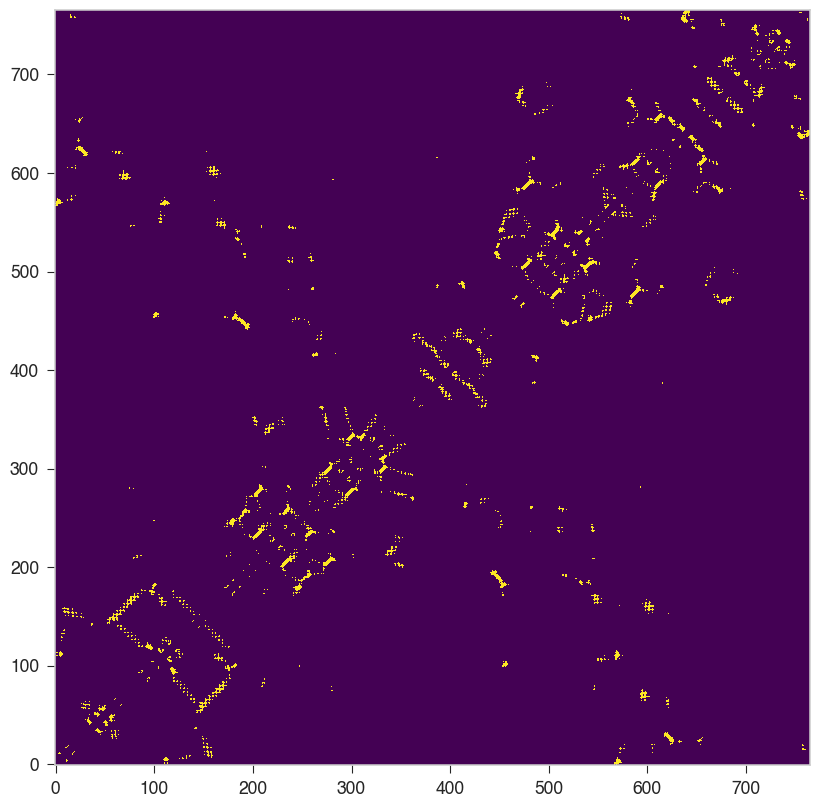

In [60]:
plt.imshow(data, origin="bottom")

In [58]:
data_s = data.astype(int)
t_s = (t>0.55).astype(float)

In [30]:
data = getContactMapFromPDB("/Users/weilu/Research/server/feb_2020/SPOT-Contact-Helical-New/outputs/3cf4.pdb")

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8106.
  PDBConstructionWarning,
/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8197.
  PDBConstructionWarning,
/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8214.
  PDBConstructionWarning,
/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8653.
  PDBConstructionWarning,


KeyError: 'CA'

In [30]:
data = getContactMapFromPDB("/Users/weilu/Research/server/jul_2019/two_chains/cleaned_pdbs/4rws.pdb")

4rws 346


In [70]:
data_s = data.astype(int)
t_s = (t>0.55).astype(float)

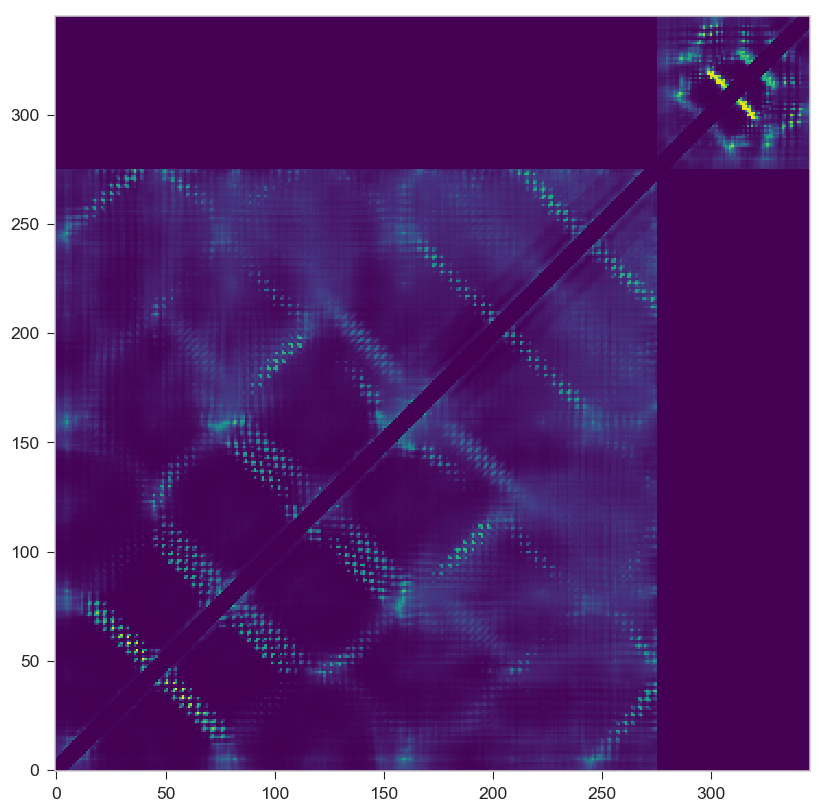

In [72]:
fig, ax = plt.subplots()
# ax.imshow(data_s+1, origin="bottom")
ax.imshow(t, origin="bottom")

In [60]:
combined = data_s + t_s * 2

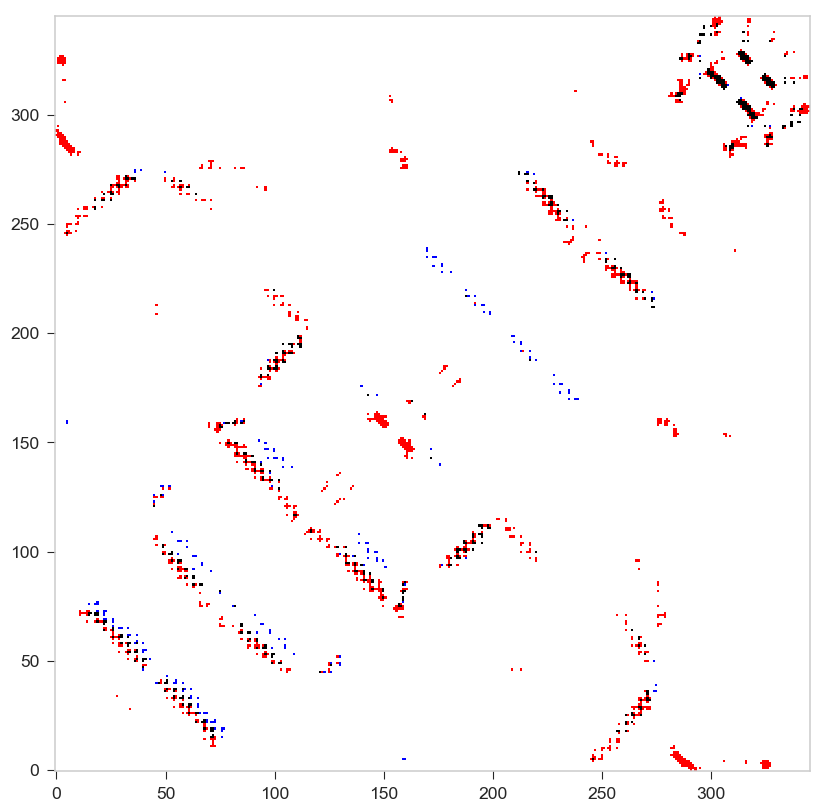

In [63]:
combined = data_s + t_s * 2
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)

In [87]:
pdbFile = "/Users/weilu/Research/server/jul_2019/two_chains/cleaned_pdbs/4rws.pdb"
parser = PDBParser()
structure = parser.get_structure('target', pdbFile)

In [88]:
model = structure[0]

In [90]:
a = list(model.get_chains())

In [92]:
c = a[0]

In [94]:
c.id

'A'

In [95]:
c = "ALL"

In [99]:
"ABC" is not "ALL"

True

In [93]:
c.get_id()

'A'

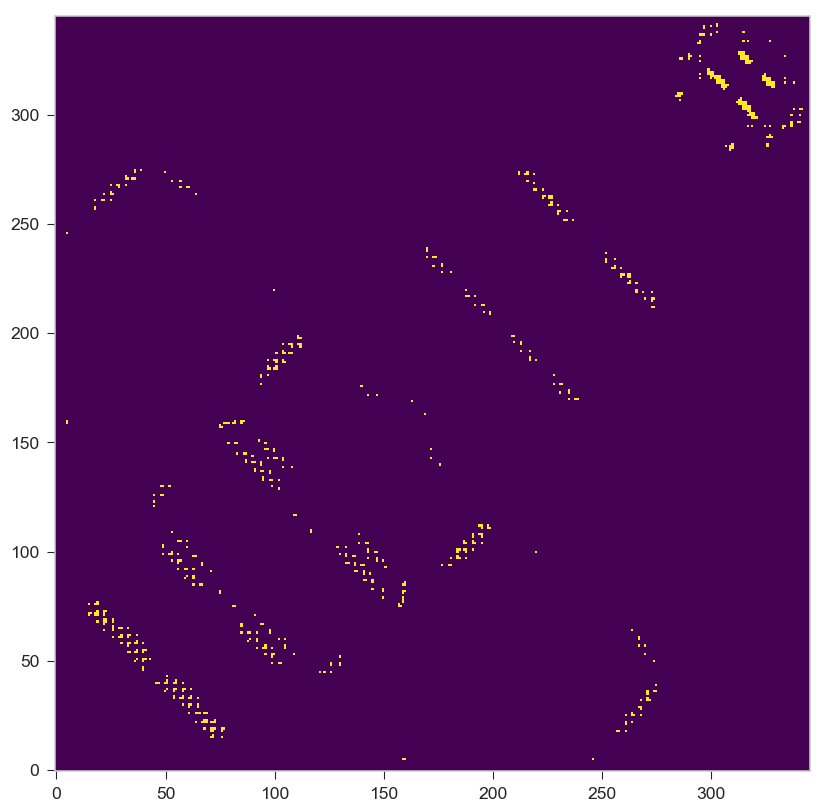

In [55]:
fig, ax = plt.subplots()
ax.imshow(data_s+1, origin="bottom")
ax.imshow(t_s, origin="bottom")

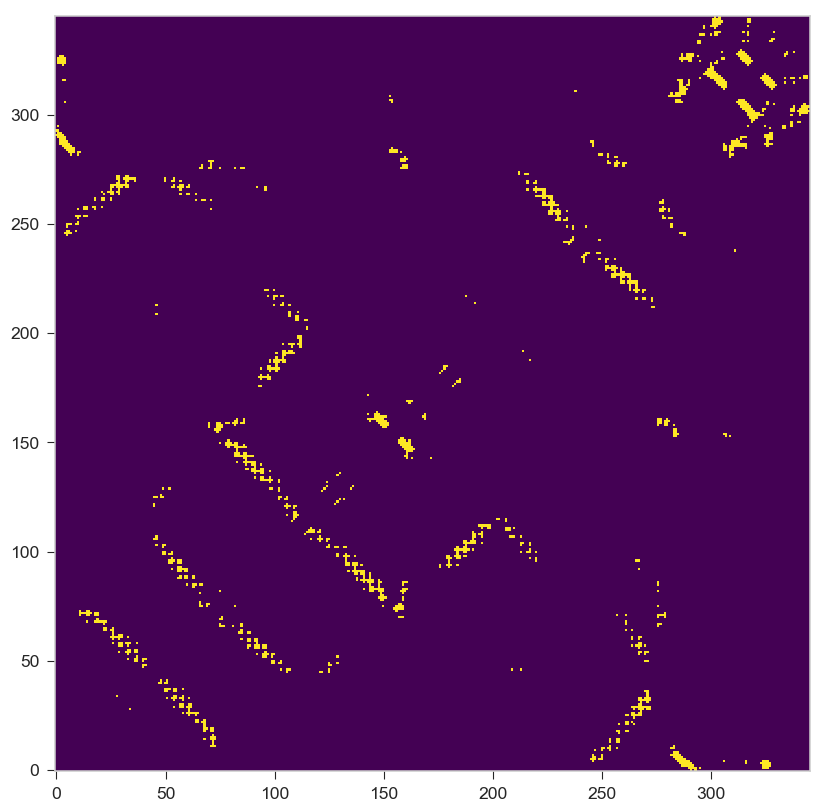

In [43]:
plt.imshow(data_s, origin="bottom")

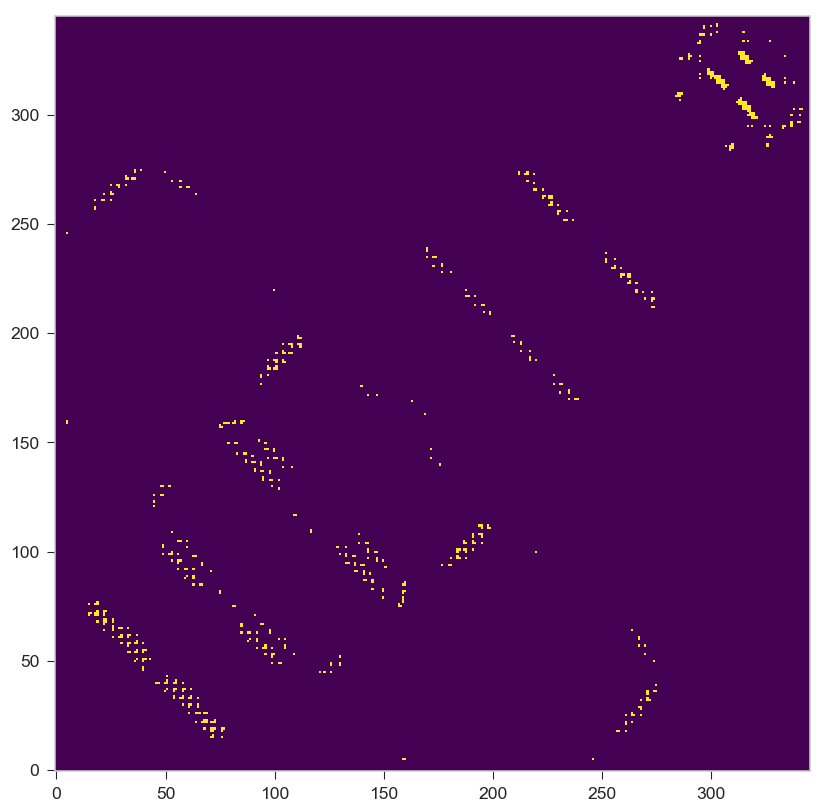

In [44]:
# plt.imshow(-data_s, origin="bottom")
plt.imshow(t_s, origin="bottom")
# plt.colorbar()

In [16]:
346

70

In [17]:
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/B.txt"

In [20]:
len(seq)

276

In [18]:
pdb = "4rws"
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/A.txt"
data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
n = int(info.query(f"Protein =='{pdb}'")["Length"])
t = np.zeros((n,n))
for index, d in data.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p

NameError: name 'info' is not defined

In [ ]:
def getContactMap(pdb):
    fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/contactmap.txt"
    data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
    data["i"] = data["i"].astype(int)
    data["j"] = data["j"].astype(int)
    n = int(info.query(f"Protein =='{pdb}'")["Length"])
    t = np.zeros((n,n))
    for index, d in data.iterrows():
    #     print(index)
        i = int(d["i"]) - 1
        j = int(d["j"]) - 1 
        p = d["p"]
    #     print(i,j,p)
        t[i,j] = p
        t[j,i] = p